In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

# CREATION FONCTIONS

## FONCTION SCORE

In [120]:
def score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred):
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score


    train_score = f'{r2_score( y_train,y_pred_train):.2f}'
    train_mae = f'{mean_absolute_error( y_train,y_pred_train):.2e}'
    train_mse = f'{mean_squared_error( y_train,y_pred_train):.2e}'
    train_mape = f'{mean_absolute_percentage_error( y_train,y_pred_train)*100:.2f}'

    test_score = f'{r2_score(y_test, y_pred_test):.2f}'
    test_mae = f'{mean_absolute_error(y_test, y_pred_test):.2e}'
    test_mse = f'{mean_squared_error(y_test, y_pred_test):.2e}'
    test_mape = f'{mean_absolute_percentage_error(y_test, y_pred_test)*100:.2f}'

    general_score = f'{r2_score(y, y_pred):.2f}'
    general_mae = f'{mean_absolute_error(y, y_pred):.2e}'
    general_mse = f'{mean_squared_error(y, y_pred):.2e}'
    general_mape = f'{mean_absolute_percentage_error(y, y_pred)*100:.2f}'

    return train_score,train_mae,train_mse,train_mape,\
    test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape


## FONCTION POUR LA REG LIN

In [121]:
def reg_lin(DF,col_num,target,type,col_a_log):

    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
    from sklearn.preprocessing import RobustScaler

    X=DF[col_num]
    y_original=DF[target]
    if type=='RAS':
        y=y_original
    elif type=='log_target':
        y=np.log(y_original)
    elif type=='log_target_feature':
        y=np.log(y_original)
        X[col_a_log]=np.log(X[col_a_log])
    
    #Standardisation des features
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


    #train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



    # Créer et entraîner un modèle de régression linéaire
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)

    # Prédictions
    if type=='RAS':
        y_pred_linear = abs(linear_reg.predict(X_test))
        y_pred_linear_train=abs(linear_reg.predict(X_train))
        y_pred_linear_general=abs(linear_reg.predict(X_scaled))
    else:
        y_pred_linear = np.exp(abs(linear_reg.predict(X_test)))
        y_pred_linear_train=np.exp(abs(linear_reg.predict(X_train)))
        y_pred_linear_general=np.exp(abs(linear_reg.predict(X_scaled)))
    # Évaluation
    if type!='RAS':
        y_test=np.exp(y_test)
        y_train=np.exp(y_train)
        
    
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)
    mae_linear= mean_absolute_error(y_test,y_pred_linear)
    mape_linear = mean_absolute_percentage_error(y_test,y_pred_linear)

    print(f"Linear Regression R² Score test: {r2_linear:.2f}")
    print(f"Linear Regression MSE test: {mse_linear:.2e}")
    print(f"Linear Regression MAE test: {mae_linear:.2e}")
    print(f"Linear Regression MAPE test: {mape_linear*100:.2f} %")

    mse_linear_train = mean_squared_error(y_train, y_pred_linear_train)
    r2_linear_train = r2_score(y_train, y_pred_linear_train)
    mae_linear_train= mean_absolute_error(y_train,y_pred_linear_train)
    mape_linear_train = mean_absolute_percentage_error(y_train,y_pred_linear_train)

    print(f"Linear Regression R² Score train: {r2_linear_train:.2f}")
    print(f"Linear Regression MSE train: {mse_linear_train:.2e}")
    print(f"Linear Regression MAE train: {mae_linear_train:.2e}")
    print(f"Linear Regression MAPE train: {mape_linear_train*100:.2f} %")
    

    mse_linear_general = mean_squared_error(y_original, y_pred_linear_general)
    r2_linear_general = r2_score(y_original, y_pred_linear_general)
    mae_linear_general= mean_absolute_error(y_original, y_pred_linear_general)
    mape_linear_general = mean_absolute_percentage_error(y_original, y_pred_linear_general)

    print(f"Linear Regression R² Score general: {r2_linear_general:.2f}")
    print(f"Linear Regression MSE general: {mse_linear_general:.2e}")
    print(f"Linear Regression MAE general: {mae_linear_general:.2e}")
    print(f"Linear Regression MAPE general: {mape_linear_general*100:.2f} %")
    

    ### CREATION DE SERIES POUR LES SCORES AFIN DE COMPARER A LA FIN DE L'ETUDE
    mse_scores = pd.Series({
        'test': f'{mse_linear:.2e}',
        'train': f'{mse_linear_train:.2e}',
        'general': f'{mse_linear_general:.2e}'
    })

    # Pour les R²
    r2_scores = pd.Series({
        'test': f'{r2_linear:.2f}',
        'train': f'{r2_linear_train:.2f}',
        'general': f'{r2_linear_general:.2f}'
    })

    # Pour les mae
    mae_scores = pd.Series({
        'test': f'{mae_linear:.2e}',
        'train': f'{mae_linear_train:.2e}',
        'general': f'{mae_linear_general:.2e}'
    })

    # Pour les mape
    mape_scores = pd.Series({
        'test': f'{mape_linear*100:.2f}',
        'train': f'{mape_linear_train*100:.2f}',
        'general': f'{mape_linear_general*100:.2f}'
    })


    return X_test,y_test,y_pred_linear,y_pred_linear_train,y_pred_linear_general,mse_scores,r2_scores,\
    mape_scores,mae_scores,linear_reg


##  FONCTION DE REPRESENTATION DES PREDICTIONS

In [122]:
def representation_predictions(y_test,y_pred,y_pred_linear):

    ### REPRESENTATION LINEAIRE VS DUMMY
    print('Représentation des prédictions linéaires et des prédictions dummy')
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color='blue', label='Dummy Predictions')
    plt.scatter(y_test, y_pred_linear, color='red', label='Linear Regression Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Valeurs réelles')
    plt.ylabel('Prédictions')
    plt.title('Comparaison des prédictions: Dummy vs Linear Regression')
    plt.legend()
    plt.show()

    

## FONCTION POUR L'ANALYSE DES HYPOTHESES DE LA REG LIN (PLOT DES RESIDUS/ DURBIN-WATSON/ BREUSCH-PAGAN/ QQ-PLOT/ DISTANCE DE COOK)

In [123]:
def suite_hypothéses(X_test,y_test,y_pred_linear):
    
    import statsmodels.api as sm


    # Plot des résidus vs valeurs prédites
    print('0) Plot des résidus vs valeurs prédites')
    residus = y_test - y_pred_linear
    plt.scatter(y_pred_linear, residus)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Valeurs prédites')
    plt.ylabel('Résidus')
    plt.title('Résidus vs Valeurs prédites')
    plt.show()




    ### DURBIN-WATSON
    print()
    print ('1) Indépendance des résidus (Test de Durbin-Watson)')
    from statsmodels.stats.stattools import durbin_watson
    dw_test = durbin_watson(residus)
    print(f"Durbin-Watson test: {dw_test}")
    if dw_test<1 or dw_test>3:
        print('Probléme')
    else:
        print('Plutot bon')


    ### HOMOSCEDASTICITE
    from statsmodels.stats.diagnostic import het_breuschpagan
    print()
    print("2) Etude de l'homoscedasticité")
    # Ajouter une constante à X
    X_avec_constante = sm.add_constant(X_test)

    # Calculer les résidus 
    residus = y_test - y_pred_linear

    # Effectuer le test de Breusch-Pagan
    test_stat, p_value, f_stat, fp_value = het_breuschpagan(residus, X_avec_constante)

    print('Statistiques du test de Breusch-Pagan:')
    print(f'p-value : {p_value:.4f}')
    print(f'statistique de test : {test_stat:.4f}')

    # Interprétation
    if p_value < 0.05:
        print("Il y a de l'hétéroscédasticité (rejet de H0)")
    else:
        print("Pas d'évidence d'hétéroscédasticité (non rejet de H0)")

    
    ### QQ-plot
    print()
    print("3) QQ-plot")
    plt.figure(figsize=(10,6))
    stats.probplot(residus, dist="norm", plot=plt)
    plt.title("Q-Q plot des résidus")
    plt.show()

    # Test de Shapiro-Wilk
    _, p_value = stats.shapiro(residus)
    print(f"p-value du test Shapiro-Wilk : {p_value}")
    if p_value < 0.05 : 
        print('résidus non normaux')
    else:
        print('résidus normaux')

    
    ### VALEURS ABERRANTES (DISTANCE DE COOK)
    print()
    print("4) Etude des valeurs aberrantes (Distance de Cook)")
    from statsmodels.stats.outliers_influence import OLSInfluence
    import statsmodels.api as sm

    # Ajuster le modèle avec statsmodels
    X_sm = sm.add_constant(X_test)
    model_sm = sm.OLS(y_test, X_sm).fit()

    # Calculer les distances de Cook
    influence = model_sm.get_influence()
    cook_distance = influence.cooks_distance[0]

    # Plot
    plt.stem(range(len(cook_distance)), cook_distance, markerfmt=',')
    plt.xlabel("Index d'observation")
    plt.ylabel("Distance de Cook")
    plt.show()
        


## FONCTION REGRESSION REGULARISEE (LASSO,RIDGE,ELASTICNET)

In [124]:
def reg_regul(DF,col_num,target,type,log_feature,alpha=1.0,l1_ratio=0.5):
    from sklearn.linear_model import Ridge, Lasso, ElasticNet
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
    import numpy as np
    import matplotlib.pyplot as plt

    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        y=np.log(y)
        if type=='log_target_feature':
            for col in log_feature:
                X[col]=np.log(X[col])



    # 1. Préparation des données
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 2. Standardisation
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_scaled = scaler.transform(X)  # Pour l'évaluation générale

    # 3. Modèles avec régularisation
    # Ridge (L2)
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)

    # Lasso (L1)
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_scaled, y_train)

    # ElasticNet (L1 + L2)
    elastic = ElasticNet(alpha=alpha,fit_intercept= True, l1_ratio=l1_ratio,max_iter=1000,random_state=42,selection='cyclic',tol=0.01)
    elastic.fit(X_train_scaled, y_train)

    # 4. Prédictions
    # Train
    y_pred_train_ridge = ridge.predict(X_train_scaled)
    y_pred_train_lasso = lasso.predict(X_train_scaled)
    y_pred_train_elastic = elastic.predict(X_train_scaled)

    if type!='RAS':
        y_pred_train_ridge=np.exp(y_pred_train_ridge)
        y_pred_train_lasso=np.exp(y_pred_train_lasso)
        y_pred_train_elastic=np.exp(y_pred_train_elastic)
    
    # Test
    y_pred_test_ridge = ridge.predict(X_test_scaled)
    y_pred_test_lasso = lasso.predict(X_test_scaled)
    y_pred_test_elastic = elastic.predict(X_test_scaled)

    if type!='RAS':
        y_pred_test_ridge=np.exp(y_pred_test_ridge)
        y_pred_test_lasso=np.exp(y_pred_test_lasso)
        y_pred_test_elastic=np.exp(y_pred_test_elastic)

    # Général
    y_pred_general_ridge = ridge.predict(X_scaled)
    y_pred_general_lasso = lasso.predict(X_scaled)
    y_pred_general_elastic = elastic.predict(X_scaled)

    if type!='RAS':
        y_pred_general_ridge=np.exp(y_pred_general_ridge)
        y_pred_general_lasso=np.exp(y_pred_general_lasso)
        y_pred_general_elastic=np.exp(y_pred_general_elastic)

    # 5. Fonction d'évaluation améliorée
    def evaluate_model(model_name, y_true_train, y_pred_train, 
                    y_true_test, y_pred_test, y_true_general, y_pred_general,type):
        # Suffix pour les noms selon le type de transformation
        suffix = "" if type == "RAS" else f"_{type}"
        
        # Création du dictionnaire des métriques
        metrics = {
            f'r2_{model_name}{suffix}': {
                'train': f'{r2_score(y_true_train, y_pred_train):.2f}',
                'test': f'{r2_score(y_true_test, y_pred_test):.2f}',
                'general': f'{r2_score(y_true_general, y_pred_general):.2f}'
            },
            f'mse_{model_name}{suffix}': {
                'train': f'{mean_squared_error(y_true_train, y_pred_train):.2e}',
                'test': f'{mean_squared_error(y_true_test, y_pred_test):.2e}',
                'general': f'{mean_squared_error(y_true_general, y_pred_general):.2e}'
            },
            f'mae_{model_name}{suffix}': {
                'train': f'{mean_absolute_error(y_true_train, y_pred_train):.2e}',
                'test': f'{mean_absolute_error(y_true_test, y_pred_test):.2e}',
                'general': f'{mean_absolute_error(y_true_general, y_pred_general):.2e}'
            },
            f'mape_{model_name}{suffix}': {
                'train': f'{mean_absolute_percentage_error(y_true_train, y_pred_train)*100:.2f}',
                'test': f'{mean_absolute_percentage_error(y_true_test, y_pred_test)*100:.2f}',
                'general': f'{mean_absolute_percentage_error(y_true_general, y_pred_general)*100:.2f}'
            }
        }
        
        return metrics
    
    if type!='RAS':
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)
        y=np.exp(y)

    # Dans la fonction principale
    all_metrics = {}

    # Pour chaque modèle
    for model_name, predictions in [("Ridge", [y_pred_train_ridge, y_pred_test_ridge, y_pred_general_ridge]),
                                ("Lasso", [y_pred_train_lasso, y_pred_test_lasso, y_pred_general_lasso]),
                                ("ElasticNet", [y_pred_train_elastic, y_pred_test_elastic, y_pred_general_elastic])]:
        metrics = evaluate_model(model_name, 
                            y_train, predictions[0],
                            y_test, predictions[1],
                            y, predictions[2],
                            type)
        all_metrics.update(metrics)

    # Création du DataFrame avec le format souhaité
    results_df = pd.DataFrame.from_dict(all_metrics, orient='index',\
                                         columns=['train', 'test', 'general']).sort_index()

    return ridge, lasso, elastic, results_df,y_test,y_pred_test_elastic,scaler

## FONCTION DECISION TREE

In [125]:
def decision_tree_regressor(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2):

    from sklearn.tree import DecisionTreeRegressor, plot_tree
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

    # Création du modèle
    dt_reg = DecisionTreeRegressor(
        max_depth=5,                # Limite la profondeur de l'arbre
        min_samples_split=10,        # Minimum d'échantillons pour diviser un nœud
        min_samples_leaf=6,         # Minimum d'échantillons dans une feuille
        random_state=42
    )

    # Entraînement
    dt_reg.fit(X_train, y_train)

    # Prédictions
    y_pred_test = dt_reg.predict(X_test)
    y_pred_train=dt_reg.predict(X_train)
    y_pred=dt_reg.predict(X)
    if type!='RAS':
        y_pred_test=np.exp(y_pred_test)
        y_train=np.exp(y_train)
        y_pred_train=np.exp(y_pred_train)
        y_test=np.exp(y_test)
        y=np.exp(y)
        y_pred=np.exp(y_pred)


    # Score

    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)



    


    print(f"Score R² train : {train_score}")
    print(f"Score R² test : {test_score}")
    print(f"Score MAE train : {train_mae}")
    print(f"Score MAE test : {test_mae}")
    print(f"Score MAPE train : {train_mape} %")
    print(f"Score MAPE test : {test_mape} %")
    print(f"Score MSE train : {train_mse}")
    print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Decision Tree']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Decision Tree']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Decision Tree']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Decision Tree']

    R2=pd.concat([R2,nouvelle_ligne])


    # Visualisation de l'arbre
    plt.figure(figsize=(40,20))  # Taille doublée
    plot_tree(dt_reg, 
            feature_names=X_train.columns, 
            filled=True,
            fontsize=12,         # Taille de la police
            max_depth=5,         # Limite la visualisation aux 5 premiers niveaux
            precision=2)         # Nombre de décimales affichées
    plt.show()

    return dt_reg,MAE,MAPE,MSE,R2

## FONCTION RANDOM FOREST

In [126]:
def random_forest(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score


    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


    # Création du modèle
    rf_reg = RandomForestRegressor(
        n_estimators=75,
        max_depth=10,           # même profondeur que notre meilleur Decision Tree
        min_samples_split=8,
        min_samples_leaf=5,
        random_state=42
    )

    # Entraînement
    rf_reg.fit(X_train, y_train)

    y_pred_test =rf_reg.predict(X_test)
    y_pred_train=rf_reg.predict(X_train)
    y_pred=rf_reg.predict(X)
    
    if type!='RAS':
        y_pred_test=np.exp(y_pred_test)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)
        y_pred_train=np.exp(y_pred_train)
        y=np.exp(y)
        y_pred=np.exp(y_pred)
    
    
    
    
    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)



    print(f"Score R² train : {train_score}")
    print(f"Score R² test : {test_score}")
    print(f"Score MAE train : {train_mae}")
    print(f"Score MAE test : {test_mae}")
    print(f"Score MAPE train : {train_mape} %")
    print(f"Score MAPE test : {test_mape} %")
    print(f"Score MSE train : {train_mse}")
    print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Random Forest']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Random Forest']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Random Forest']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Random Forest']

    R2=pd.concat([R2,nouvelle_ligne])

    # Feature importance
    #feature_importance = pd.DataFrame({
     #   'feature': X_train.columns,
      #  'importance': rf_reg.feature_importances_
    #})
    #print("\nImportance des features :")
    #print(feature_importance.sort_values('importance', ascending=False))

    return rf_reg,MAE,MAPE,MSE,R2

## FONCTION GRADIENT BOOSTING

In [127]:
def gradient_boosting(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2):
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score


    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


    # Création du modèle
    gb_reg = GradientBoostingRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.05,     # learning rate réduit
        min_samples_split=12,   # augmenté
        min_samples_leaf=8,     # augmenté
        subsample=0.7,         # réduit pour plus de randomisation
        random_state=42
    )

    # Entraînement avec données log
    gb_reg.fit(X_train, y_train)

    y_pred_test=gb_reg.predict(X_test)
    y_pred_train=gb_reg.predict(X_train)
    y_pred=gb_reg.predict(X)
    
    if type!='RAS':
        y=np.exp(y)
        y_pred_test=np.exp(y_pred_test)
        y_pred_train=np.exp(y_pred_train)
        y_pred=np.exp(y_pred)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)
    
    
    
    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)


    print(f"Score R² train : {train_score}")
    print(f"Score R² test : {test_score}")
    print(f"Score MAE train : {train_mae}")
    print(f"Score MAE test : {test_mae}")
    print(f"Score MAPE train : {train_mape} %")
    print(f"Score MAPE test : {test_mape} %")
    print(f"Score MSE train : {train_mse}")
    print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Gradient Boosting']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Gradient Boosting']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Gradient Boosting']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['Gradient Boosting']

    R2=pd.concat([R2,nouvelle_ligne])




    # Feature importance
    #feature_importance = pd.DataFrame({
     #   'feature': X_train_log.columns,
      #  'importance': gb_reg.feature_importances_
    #})
    #print("\nImportance des features :")
    #print(feature_importance.sort_values('importance', ascending=False))

    return gb_reg,MAE,MAPE,MSE,R2

## FONCTION XGBOOST

In [128]:
def xgboost_reg(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2,verbose=True):

    import xgboost as xgb
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score



    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])
    
    

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


    # Création du modèle
    xgb_reg = xgb.XGBRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.05,     # même learning rate que notre meilleur GB
        min_child_weight=6,     # équivalent à min_samples_leaf
        subsample=0.7,          # même que notre meilleur GB
        colsample_bytree=0.8,   # échantillonnage des features
        reg_alpha=0.1,          # régularisation L1
        reg_lambda=1,           # régularisation L2
        random_state=42
    )

    # Entraînement avec données log
    xgb_reg.fit(X_train, y_train)

    y_pred_test=xgb_reg.predict(X_test)
    y_pred_train=xgb_reg.predict(X_train)
    y_pred=xgb_reg.predict(X)

    if type!='RAS':
        y=np.exp(y)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)
        y_pred_test=np.exp(y_pred_test)
        y_pred_train=np.exp(y_pred_train)
        y_pred=np.exp(y_pred)
    
    
    
    
    
    
    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)


    if verbose:
        print(f"Score R² train : {train_score}")
        print(f"Score R² test : {test_score}")
        print(f"Score MAE train : {train_mae}")
        print(f"Score MAE test : {test_mae}")
        print(f"Score MAPE train : {train_mape} %")
        print(f"Score MAPE test : {test_mape} %")
        print(f"Score MSE train : {train_mse}")
        print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['XGBoost']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['XGBoost']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['XGBoost']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['XGBoost']

    R2=pd.concat([R2,nouvelle_ligne])


    # Feature importance
    #feature_importance = pd.DataFrame({
     #   'feature': X_train_log.columns,
      #  'importance': xgb_reg.feature_importances_
    #})
    #print("\nImportance des features :")
    #print(feature_importance.sort_values('importance', ascending=False))

    return xgb_reg,MAE,MAPE,MSE,R2

## FONCTION SVR

In [129]:
def svr_reg(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2,verbose=True,\
            params={'kernel':'rbf','C':1.0,'epsilon':0.1,'gamma':'scale'}):
    from sklearn.svm import SVR
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score



    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
    
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


    # Scaling des données log-transformées
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_scaled= scaler.transform(X)

    # Scaling de y aussi
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

    # Création du modèle
    svr = SVR(
        kernel=params['kernel'],
        C=params['C'],
        epsilon=params['epsilon'],
        gamma=params['gamma']
    )

    # Entraînement
    svr.fit(X_train_scaled, y_train_scaled)

    # Prédictions
    y_train_pred_scaled = svr.predict(X_train_scaled)
    y_test_pred_scaled = svr.predict(X_test_scaled)
    y_pred_scaled = svr.predict(X_scaled)

    # Retransformation pour calculer le R²
    y_pred_train = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
    y_pred_test = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()

    if type!='RAS':
        y=np.exp(y)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)

        y_pred_train=np.exp(y_pred_train)
        y_pred_test=np.exp(y_pred_test)
        y_pred = np.exp(y_pred)

    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)


    if verbose:
        print(f"Score R² train : {train_score}")
        print(f"Score R² test : {test_score}")
        print(f"Score MAE train : {train_mae}")
        print(f"Score MAE test : {test_mae}")
        print(f"Score MAPE train : {train_mape} %")
        print(f"Score MAPE test : {test_mape} %")
        print(f"Score MSE train : {train_mse}")
        print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['SVR']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['SVR']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['SVR']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['SVR']

    R2=pd.concat([R2,nouvelle_ligne])

    return MAE,MAPE,MSE,R2,svr,scaler,scaler_y

## FONCTION NEURAL NETWORK

In [130]:
def nn_reg_fonc(DF,col_num,target,type,col_a_log,MAE,MAPE,MSE,R2):

    from sklearn.neural_network import MLPRegressor
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score




    X=DF[col_num]
    y=DF[target]

    if type!='RAS':
    
        y=np.log(y)
        if type=='log_target_feature':
            for col in col_a_log:
                X[col]=np.log(X[col])


    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


    # Scaling des données log-transformées
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_scaled = scaler.transform(X)

    # Scaling de y aussi
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

    # Création du modèle
    nn_reg = MLPRegressor(
        hidden_layer_sizes=(24, 12, 6),  # Architecture pyramidale
        activation='relu',
        solver='adam',
        alpha=0.05,                      # Régularisation modérée
        batch_size=32,                   # Batch size explicite
        learning_rate='adaptive',
        learning_rate_init=0.005,        # Learning rate modéré
        early_stopping=True,             # Arrêt précoce
        validation_fraction=0.1,         # 10% des données pour validation
        n_iter_no_change=10,            # Patience pour early stopping
        max_iter=1000,
        random_state=42
    )

    # Entraînement
    nn_reg.fit(X_train_scaled, y_train_scaled)

    # Prédictions
    y_train_pred_scaled = nn_reg.predict(X_train_scaled)
    y_test_pred_scaled = nn_reg.predict(X_test_scaled)
    y_pred_scaled = nn_reg.predict(X_scaled)

    # Retransformation pour les scores
    y_pred_train = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()
    y_pred_test = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

    if type!='RAS':
        y=np.exp(y)
        y_train=np.exp(y_train)
        y_test=np.exp(y_test)

        y_pred_train=np.exp(y_pred_train)
        y_pred_test=np.exp(y_pred_test)
        y_pred=np.exp(y_pred)



    # Score
    train_score,train_mae,train_mse,train_mape,test_score,test_mae,test_mse,test_mape,\
    general_score,general_mae,general_mse,general_mape=\
    score(y_train,y_pred_train,y_test,y_pred_test,y,y_pred)



    print(f"Score R² train : {train_score}")
    print(f"Score R² test : {test_score}")
    print(f"Score MAE train : {train_mae}")
    print(f"Score MAE test : {test_mae}")
    print(f"Score MAPE train : {train_mape} %")
    print(f"Score MAPE test : {test_mape} %")
    print(f"Score MSE train : {train_mse}")
    print(f"Score MSE test : {test_mse}")

    mae=pd.Series([train_mae,test_mae,general_mae],index=['train','test','general'])
    mse=pd.Series([train_mse,test_mse,general_mse],index=['train','test','general'])
    mape=pd.Series([train_mape,test_mape,general_mape],index=['train','test','general'])
    r2=pd.Series([train_score,test_score,general_score],index=['train','test','general'])


    nouvelle_ligne=mae
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['NN']

    MAE=pd.concat([MAE,nouvelle_ligne])

    nouvelle_ligne=mape
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['NN']

    MAPE=pd.concat([MAPE,nouvelle_ligne])

    nouvelle_ligne=mse
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['NN']

    MSE=pd.concat([MSE,nouvelle_ligne])

    nouvelle_ligne=r2
    nouvelle_ligne=nouvelle_ligne.to_frame().T
    nouvelle_ligne.index=['NN']

    R2=pd.concat([R2,nouvelle_ligne])

    return nn_reg,MAE,MAPE,MSE,R2,scaler,scaler_y

## TABLEAU DES SCORES


In [131]:
Tableau_score_r2=pd.DataFrame(columns=['train','test','general'])
Tableau_score_mae=pd.DataFrame(columns=['train','test','general'])
Tableau_score_mape=pd.DataFrame(columns=['train','test','general'])
Tableau_score_mse=pd.DataFrame(columns=['train','test','general'])
Tableau_score_feature=pd.DataFrame(columns=['Nbre Feature Pertinentes'])

# DEBUT DE L'ETUDE

In [132]:
DF_cleaned=pd.read_csv('DF_nettoyé.csv')

In [133]:
DF_cleaned.head()

,BuildingType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,...,%_elec(kBtu),%_gas(kBtu),%_steam(kBtu),%_parking,%_immeuble,PrimaryPropertyType_Autres,PrimaryPropertyType_Education et Services Communautaires,PrimaryPropertyType_Immobilier Commercial,PrimaryPropertyType_Logistique et Stockage,PrimaryPropertyType_Santé
0,NonResidential,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1.0,...,55.0,18.0,28.0,0.0,100.0,0.0,0.0,1.0,0.0,0.0
1,NonResidential,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1.0,...,39.0,61.0,0.0,15.0,85.0,0.0,0.0,1.0,0.0,0.0
2,NonResidential,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1.0,...,68.0,2.0,30.0,21.0,79.0,0.0,0.0,1.0,0.0,0.0
3,NonResidential,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1.0,...,41.0,27.0,33.0,0.0,100.0,0.0,0.0,1.0,0.0,0.0
4,NonResidential,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1.0,...,38.0,62.0,0.0,35.0,65.0,0.0,0.0,1.0,0.0,0.0


In [134]:
DF_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 36 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   BuildingType                                              1429 non-null   object 
 1   PropertyName                                              1429 non-null   object 
 2   Address                                                   1429 non-null   object 
 3   ZipCode                                                   1429 non-null   float64
 4   TaxParcelIdentificationNumber                             1429 non-null   object 
 5   CouncilDistrictCode                                       1429 non-null   int64  
 6   Neighborhood                                              1429 non-null   object 
 7   Latitude                                                  1429 non-null   float64
 8   Longitude         

In [135]:
DF_cleaned.loc[DF_cleaned['TotalGHGEmissions']<=0]

,BuildingType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,...,%_elec(kBtu),%_gas(kBtu),%_steam(kBtu),%_parking,%_immeuble,PrimaryPropertyType_Autres,PrimaryPropertyType_Education et Services Communautaires,PrimaryPropertyType_Immobilier Commercial,PrimaryPropertyType_Logistique et Stockage,PrimaryPropertyType_Santé
1389,NonResidential,Bullitt Center,1501 E. Madison St.,98122.0,7234600195,3,CENTRAL,47.61432,-122.31257,1.0,...,100.0,-0.0,-0.0,0.0,100.0,0.0,0.0,1.0,0.0,0.0


Il y aune entrée avec la target négative on va la retirer


In [136]:
DF_cleaned=DF_cleaned.loc[DF_cleaned['TotalGHGEmissions']>0]
DF_cleaned=DF_cleaned.reset_index()

ON VA DROP UNE COLONNE DU ONE HOT POUR LA REGRESSION LINEAIRE CAR SINON VARIABLES TROP CORELLEES

In [137]:
DF_cleaned_lineaire=DF_cleaned.drop(['PrimaryPropertyType_Autres','index'],axis=1)


ON VA DROP SiteEnergyUseWN(kBtu) CAR PAS DISPO LORS DE L'ETUDE

In [138]:
DF_cleaned_lineaire=DF_cleaned_lineaire.drop(['SiteEnergyUseWN(kBtu)'],axis=1)

In [139]:
DF_cleaned_lineaire.shape

(1428, 34)

In [140]:
len(DF_cleaned['LargestPropertyUseType'].unique())

50

In [141]:
col_num=[]
col_obj=[]
for col in DF_cleaned_lineaire.columns:
    if DF_cleaned_lineaire[col].dtype in ['int64','float64'] :
        col_num.append(col)
    else:
        col_obj.append(col)

In [142]:
colonne_à_retirer=[]
for col in col_num:
    if DF_cleaned_lineaire[col].isna().sum()!=0:
        colonne_à_retirer.append(col)
print(colonne_à_retirer)
for t in colonne_à_retirer:
    del(col_num[col_num.index(t)])

['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore']


# DEFINITION DE LA TARGET

In [143]:
TARGET='TotalGHGEmissions'

In [144]:
DF_cleaned_lineaire[TARGET].describe()

count     1428.000000
mean       168.788186
std        591.794757
min          0.400000
25%         19.670000
50%         48.035000
75%        134.717500
max      12307.160000
Name: TotalGHGEmissions, dtype: float64

# VERIFICATION DES HYPOTHESES DE LA REGRESSION LINEAIRE

## 1) ETUDE DU VIF ( Variance Inflation Factor )

In [145]:

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data =DF_cleaned_lineaire[col_num]
X = sm.add_constant(data)

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

print("\n Analyse VIF (multicolinéarité)")
vif_data = calculate_vif(X.drop('const', axis=1))
print(vif_data)


 Analyse VIF (multicolinéarité)
                                             Variable           VIF
13                                         %_immeuble  5.408548e+07
12                                          %_parking  1.582927e+06
10                                        %_gas(kBtu)  5.369269e+04
9                                        %_elec(kBtu)  5.351432e+04
11                                      %_steam(kBtu)  6.634977e+03
6                                    PropertyGFATotal  3.087438e+00
5                                      NumberofFloors  2.637700e+00
15          PrimaryPropertyType_Immobilier Commercial  2.606873e+00
7                                   TotalGHGEmissions  2.344067e+00
16         PrimaryPropertyType_Logistique et Stockage  2.213534e+00
1                                 CouncilDistrictCode  2.150190e+00
14  PrimaryPropertyType_Education et Services Comm...  1.745933e+00
2                                            Latitude  1.625579e+00
4              

## 2) SCATTER PLOTS

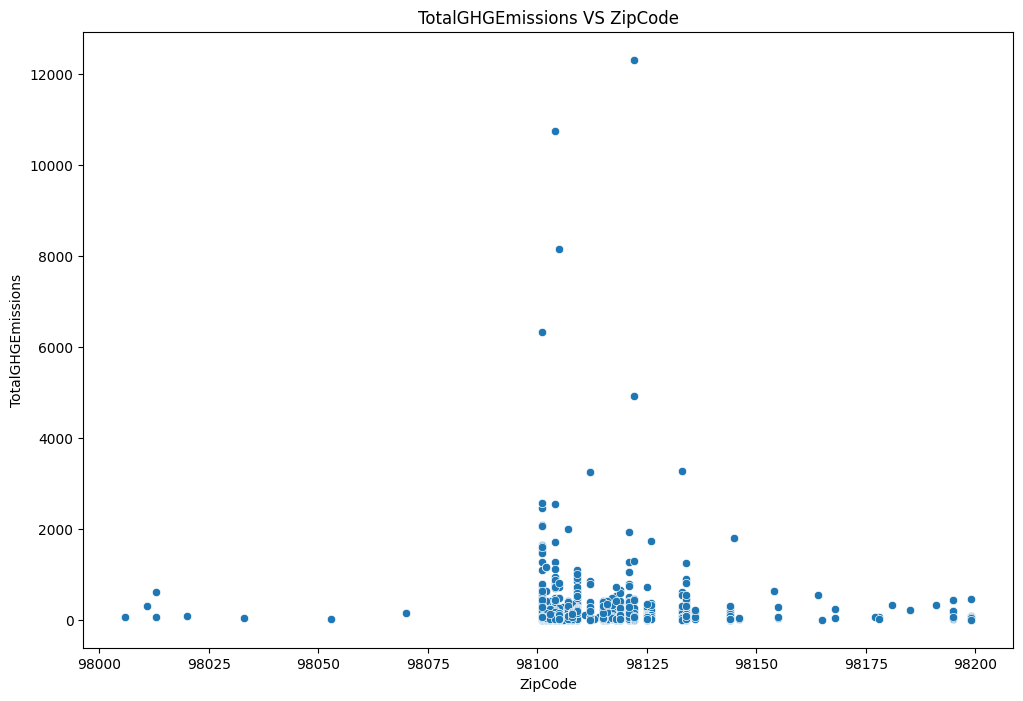

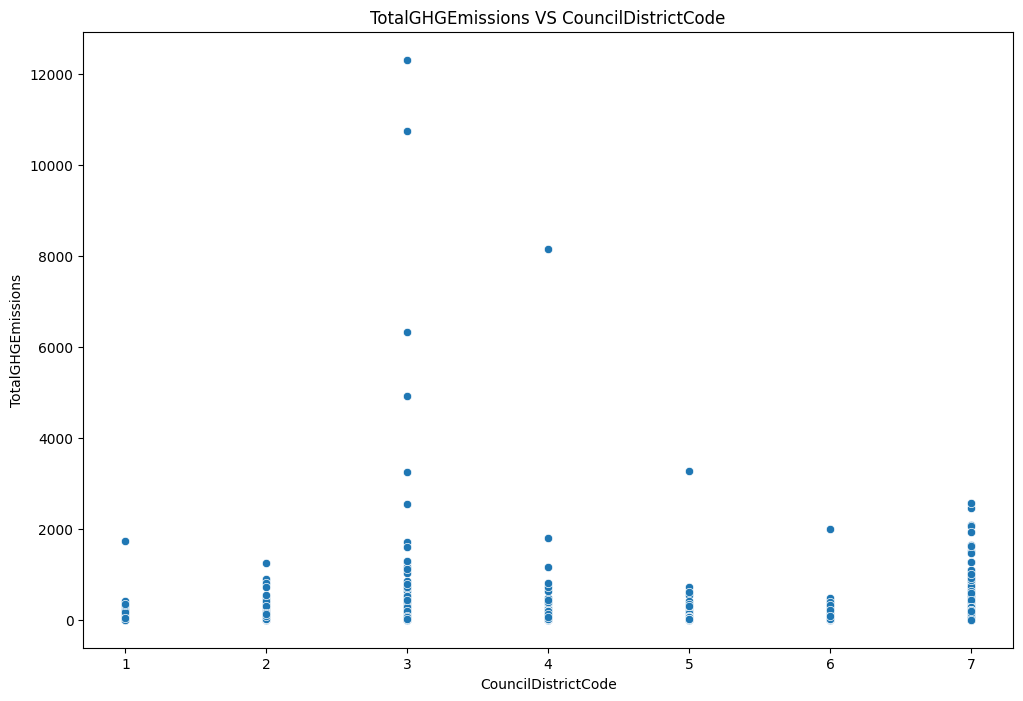

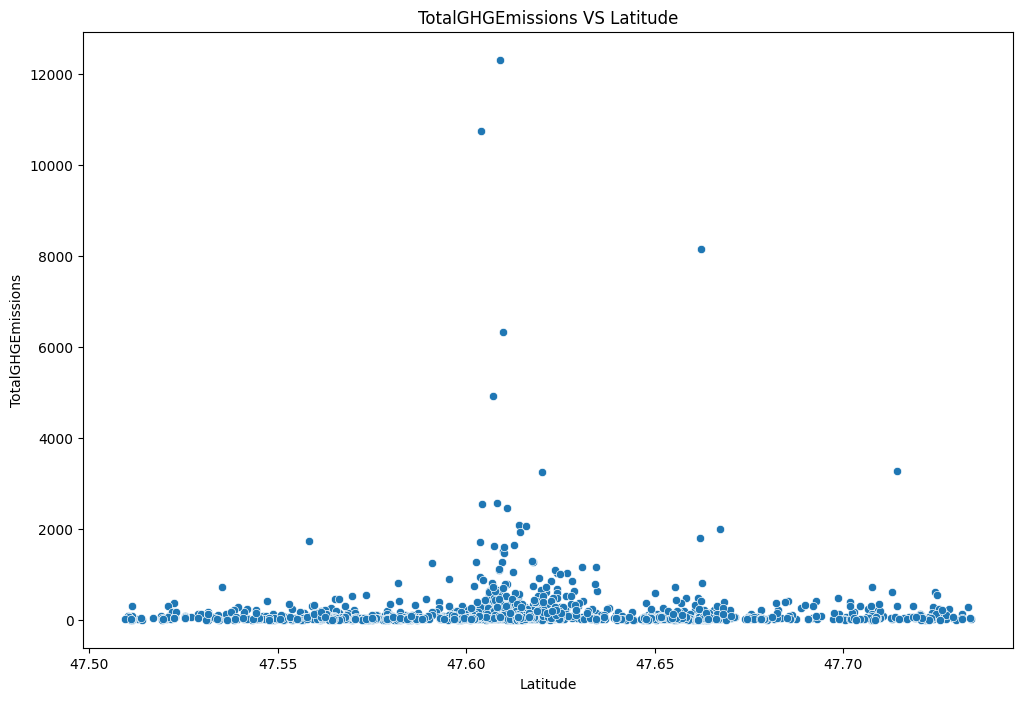

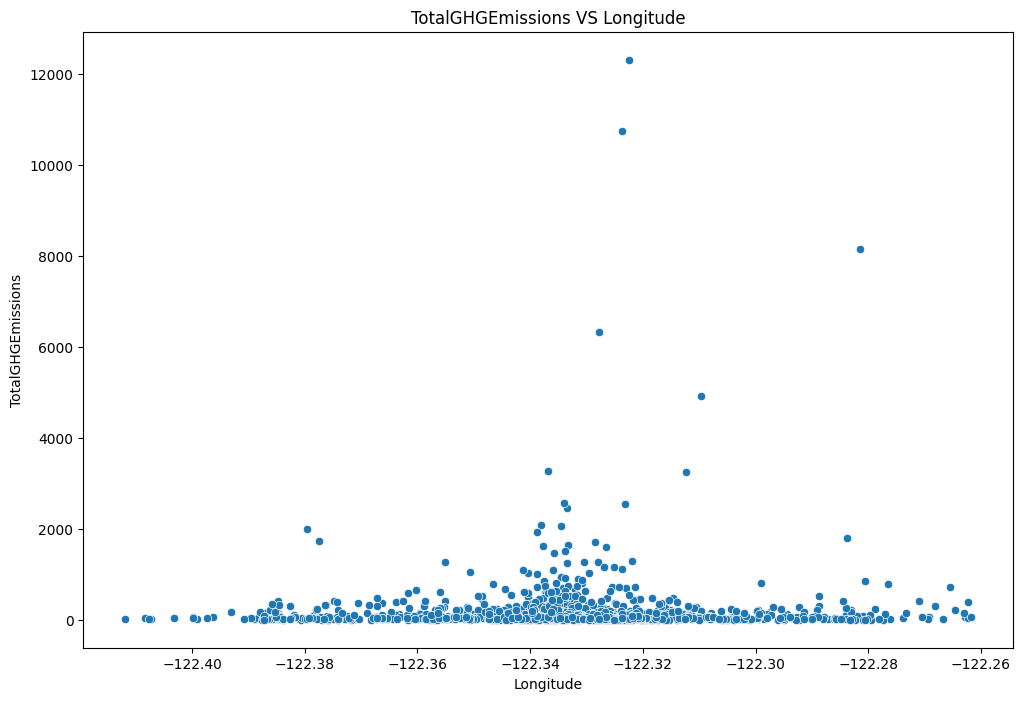

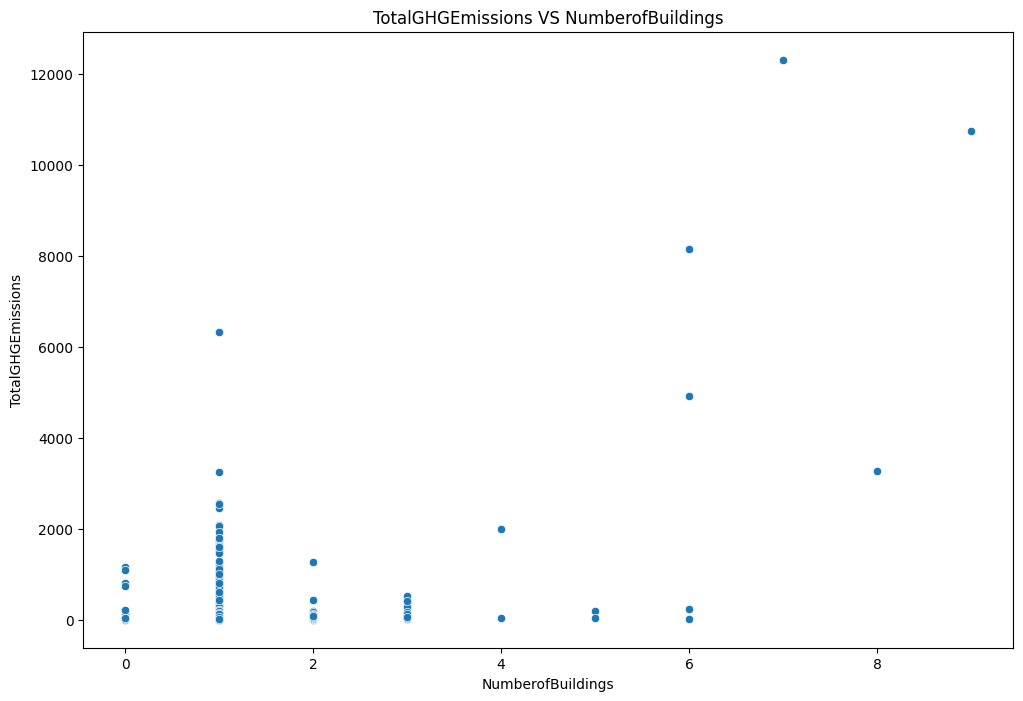

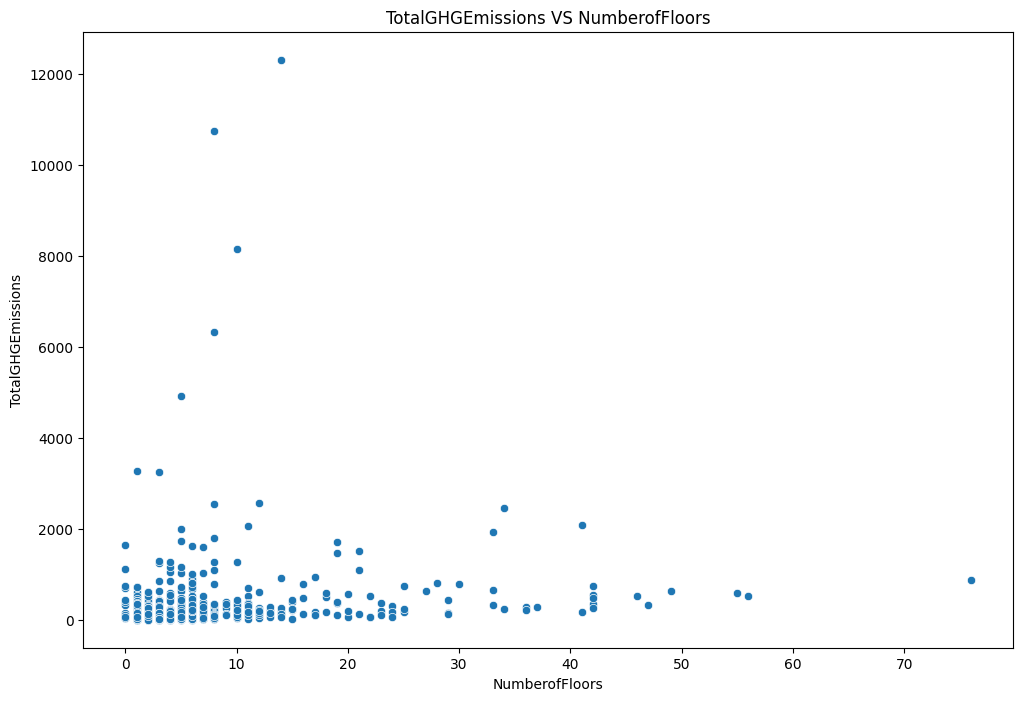

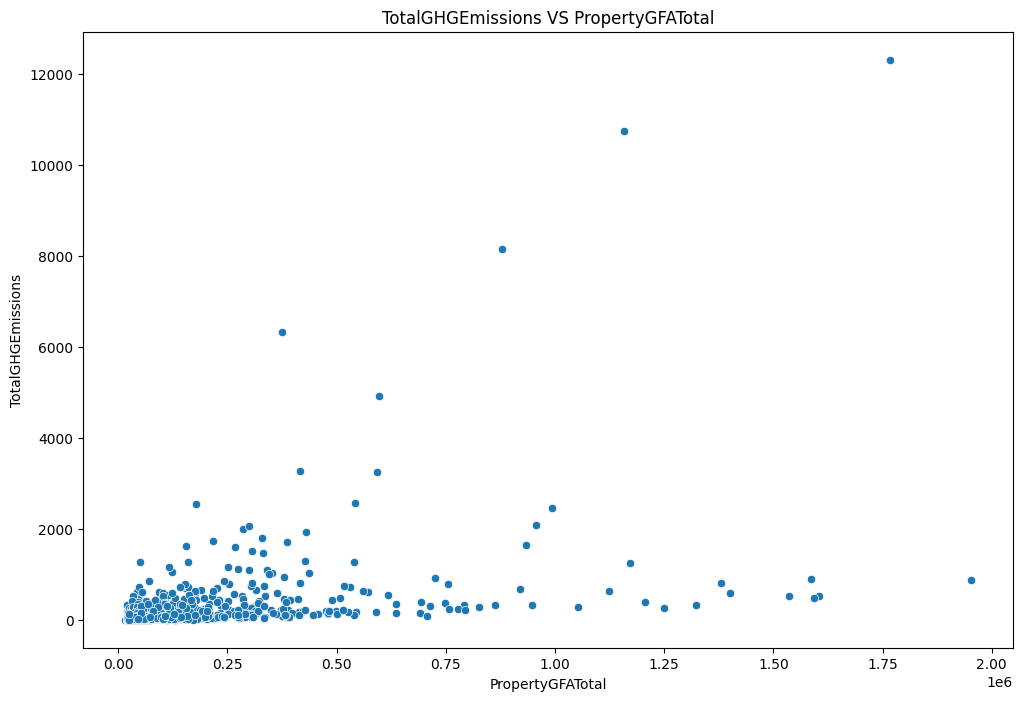

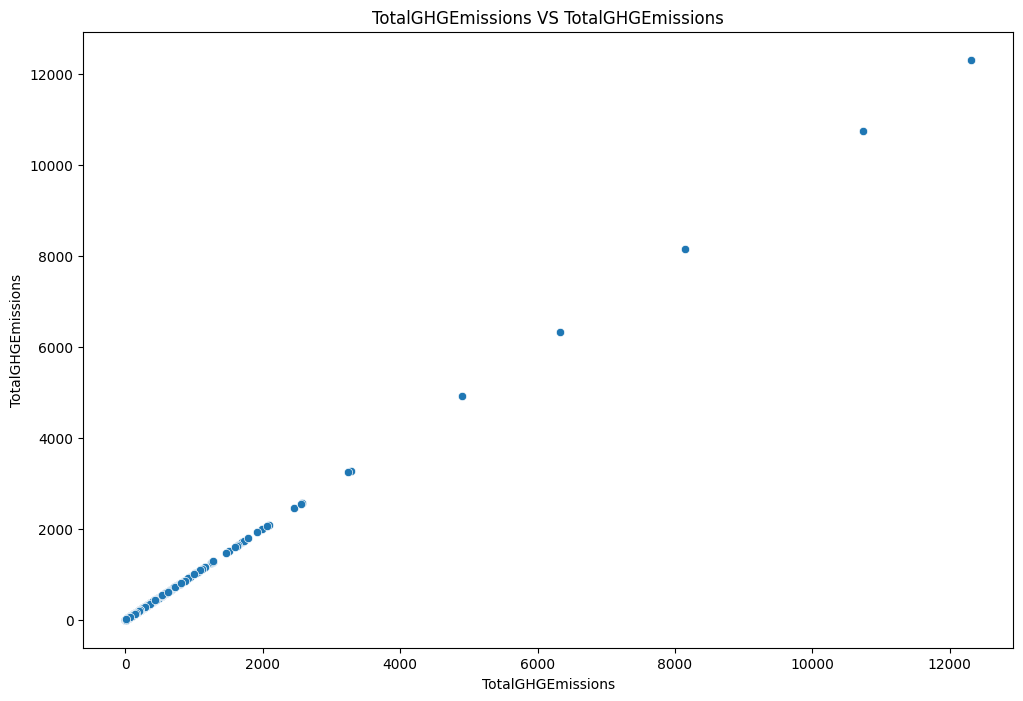

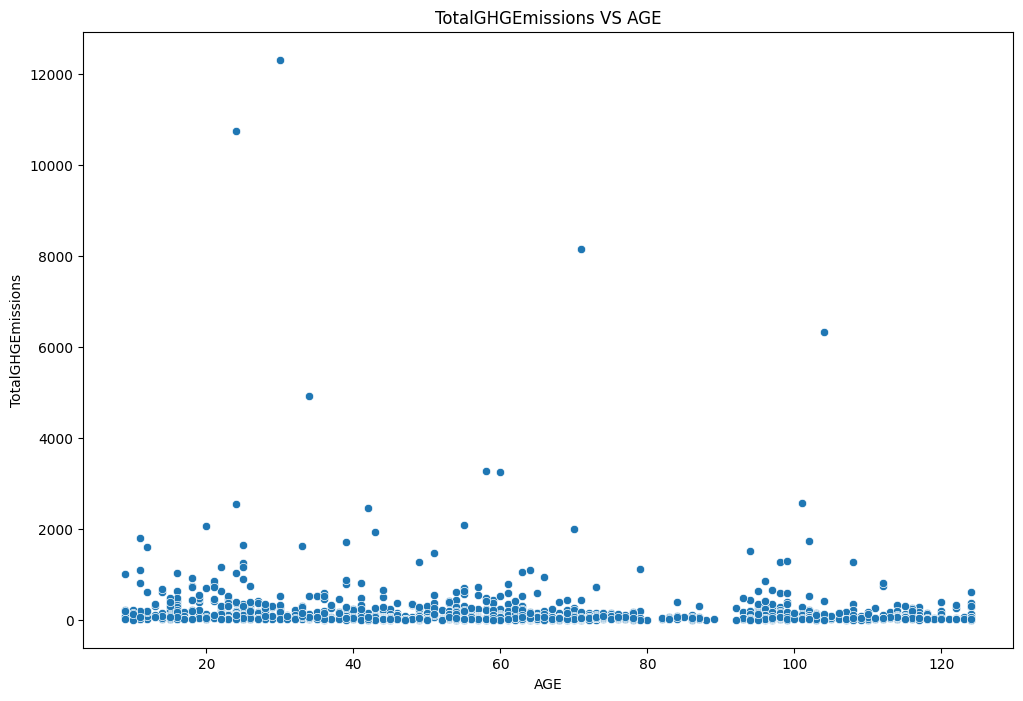

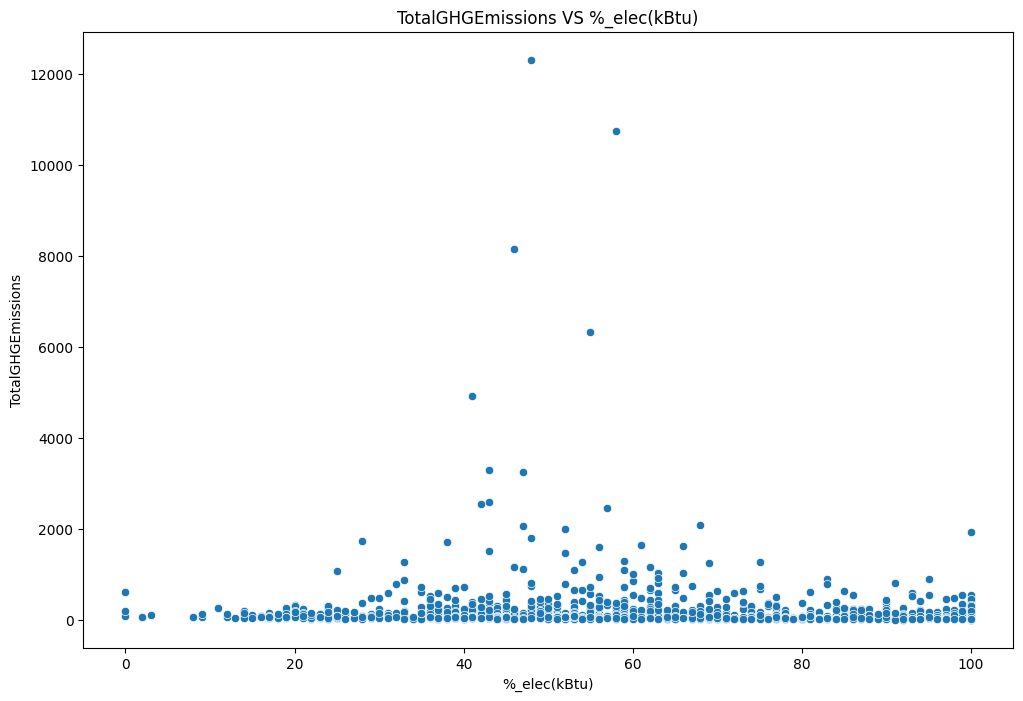

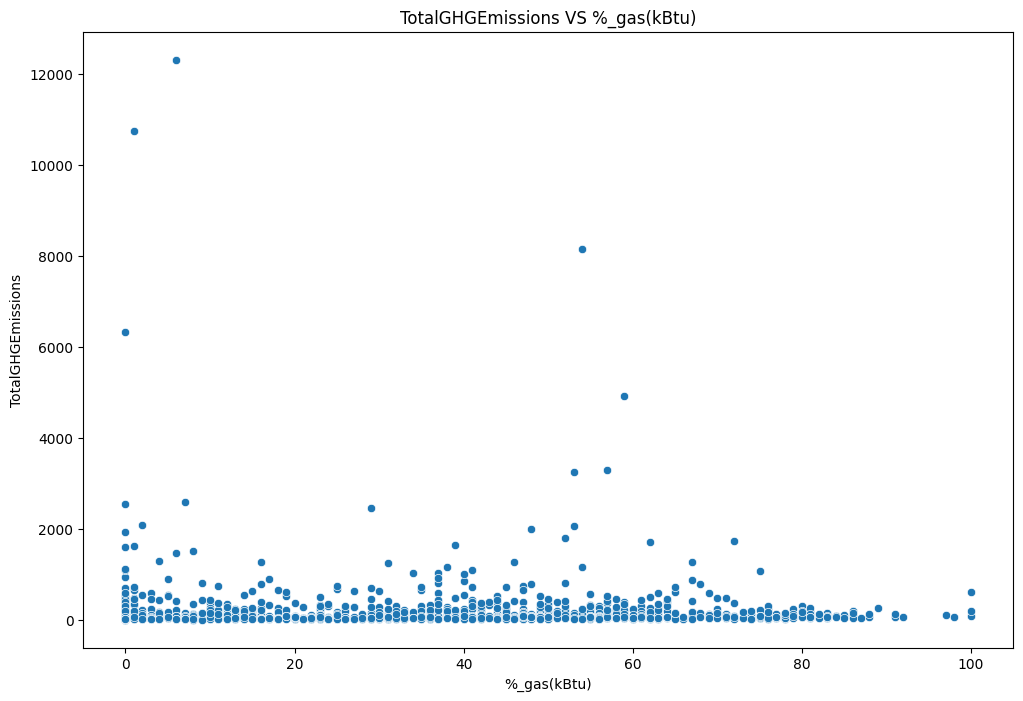

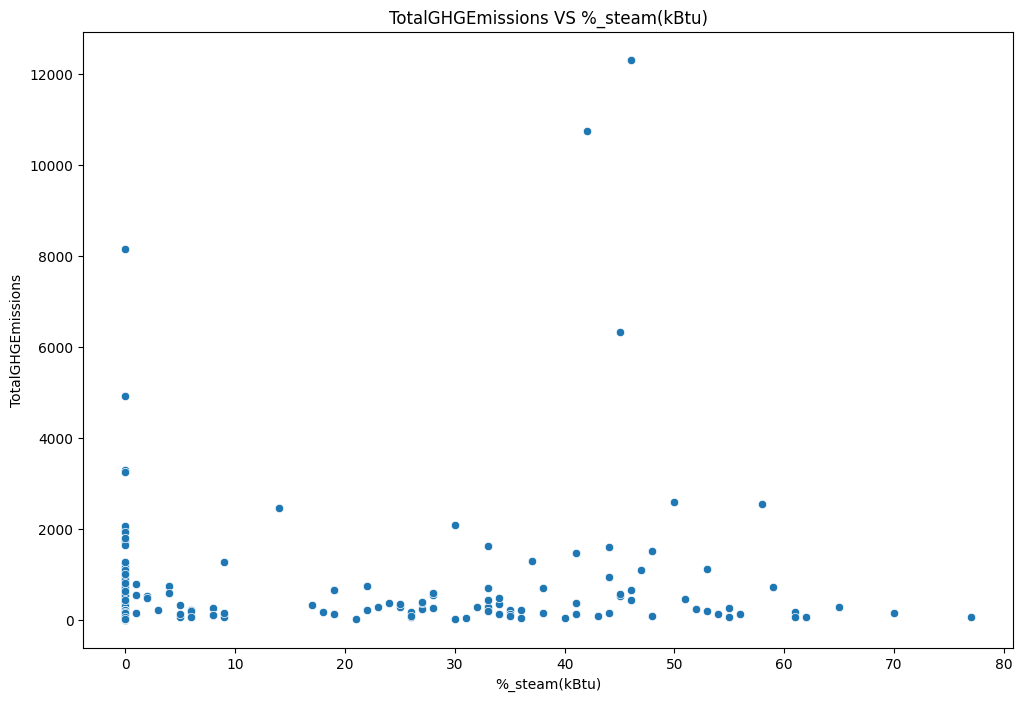

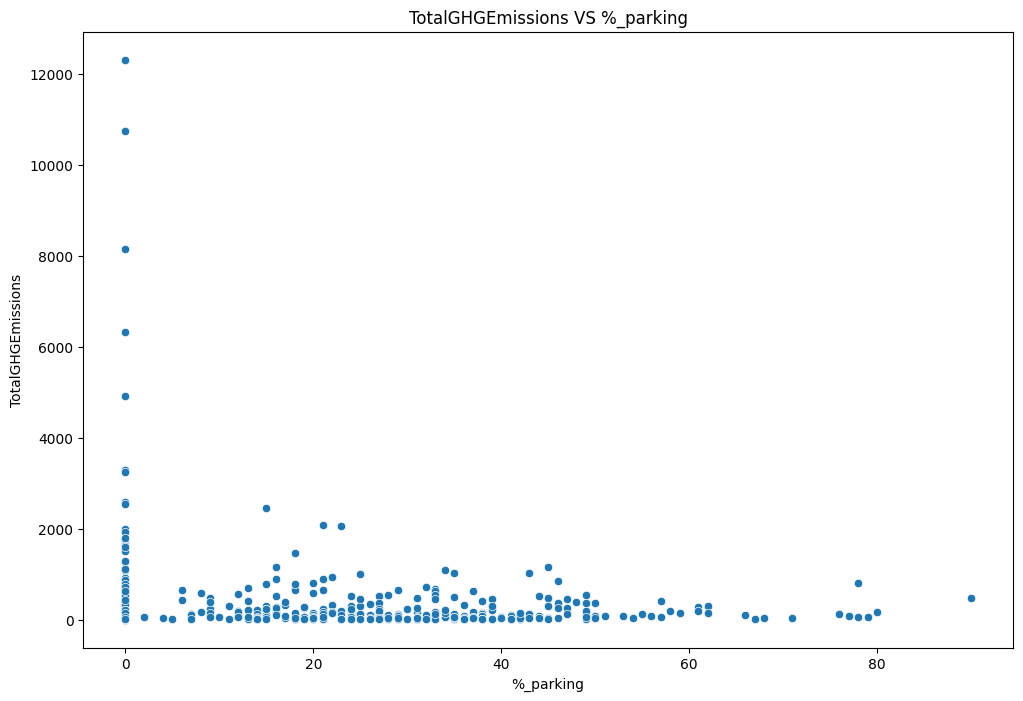

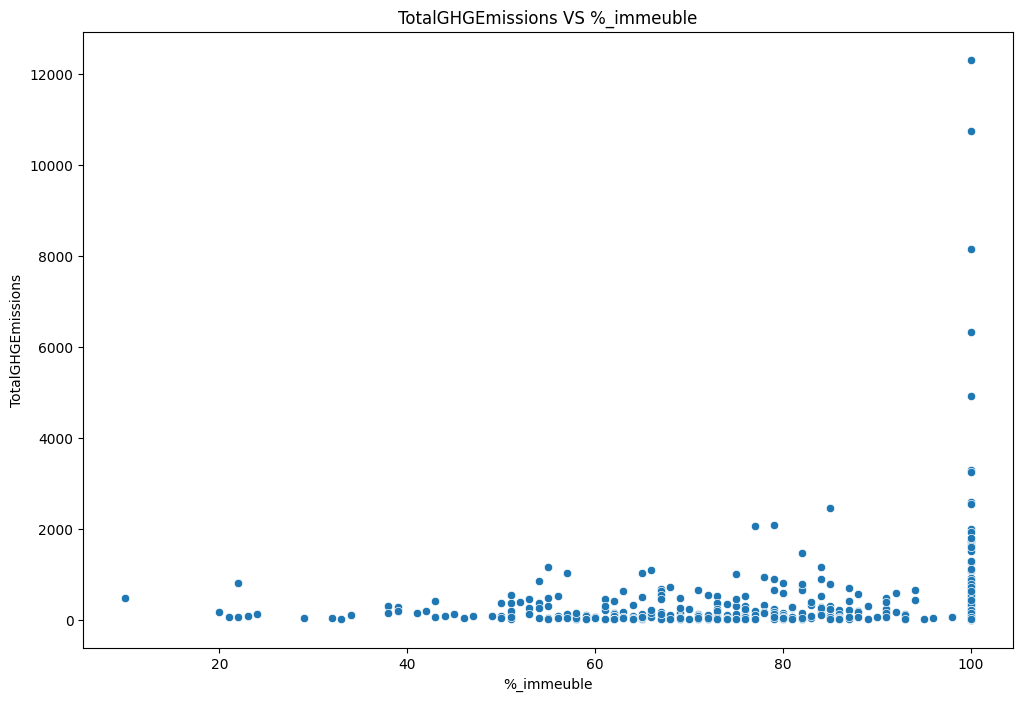

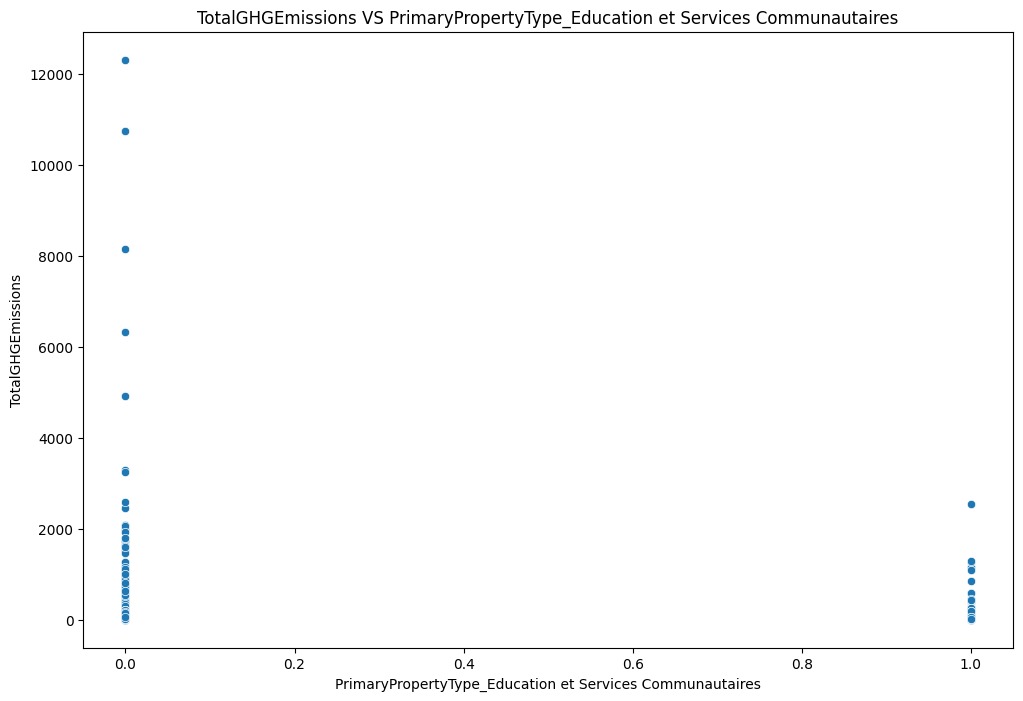

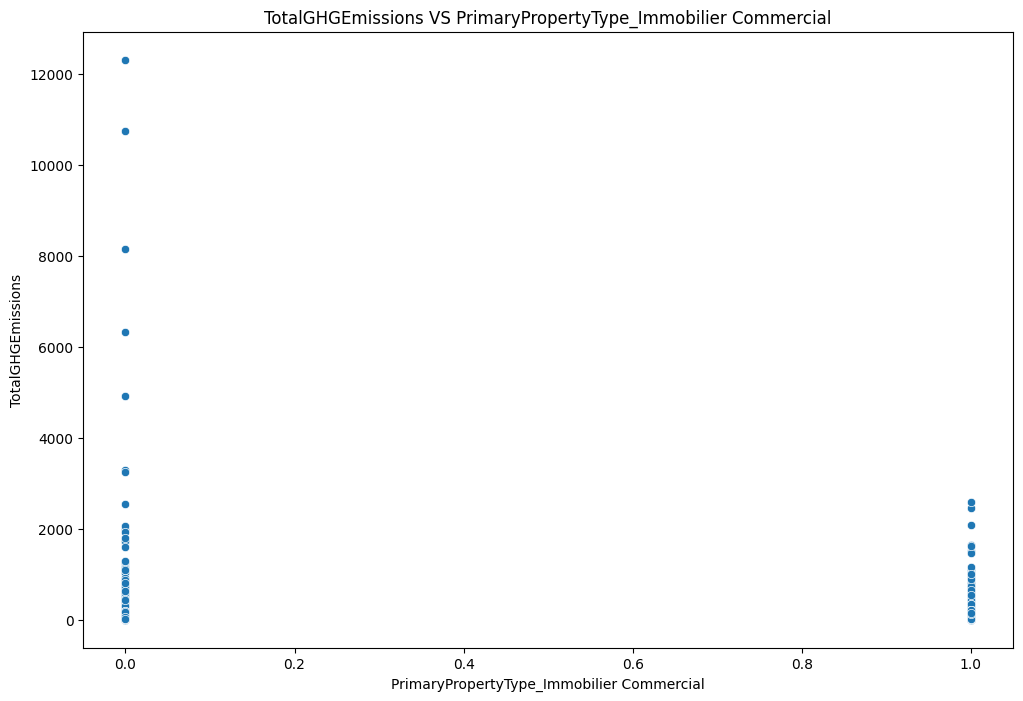

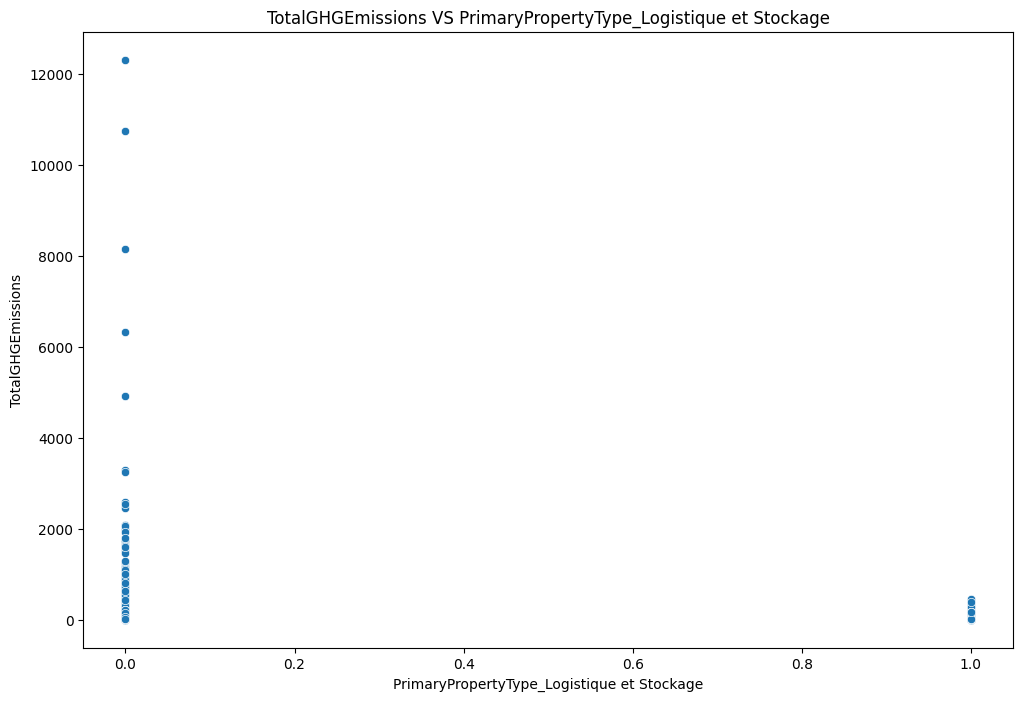

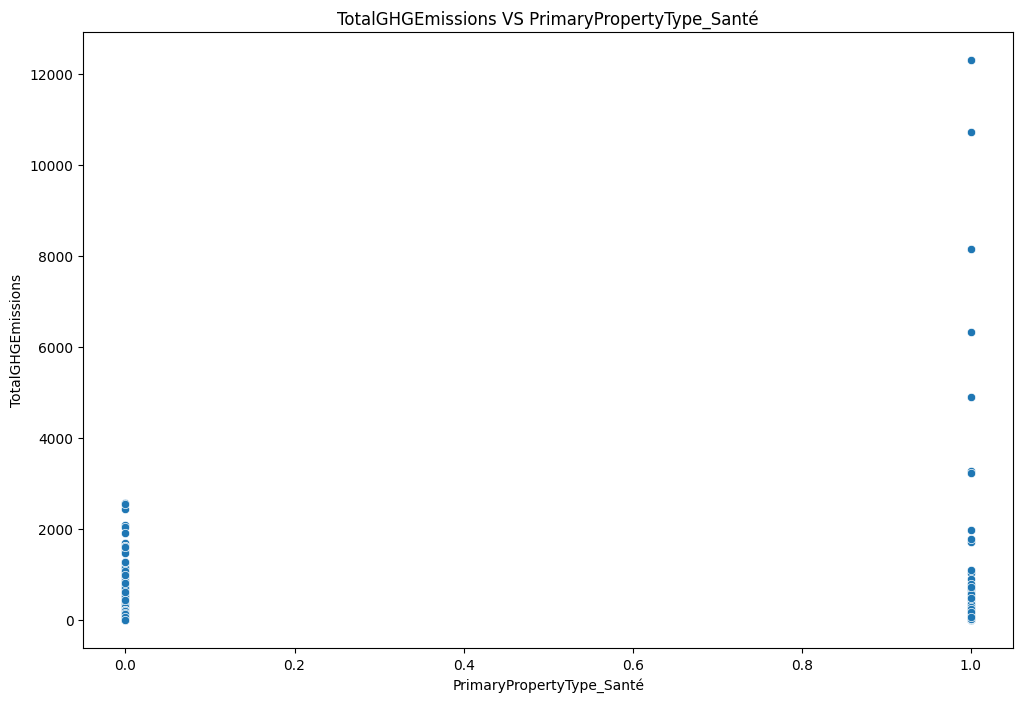

In [146]:
for col in col_num:
    plt.figure(figsize=(12,8))
    sns.scatterplot(x=DF_cleaned_lineaire[col],y=DF_cleaned_lineaire[TARGET])
    plt.title(f'{TARGET} VS {col}')
    plt.show()

## ANALYSE STATS MODELS

In [147]:
X=DF_cleaned_lineaire[col_num].drop([TARGET],axis=1)
y=DF_cleaned_lineaire[TARGET]


X=sm.add_constant(X)

In [148]:
model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     118.5
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          3.57e-247
Time:                        21:19:57   Log-Likelihood:                -10533.
No. Observations:                1428   AIC:                         2.110e+04
Df Residuals:                    1411   BIC:                         2.119e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

## SELECTION VARIABLES

1. Analyse des corrélations

Corrélations avec SiteEnergyUse:
TotalGHGEmissions                                           1.000000
NumberofBuildings                                           0.569579
PropertyGFATotal                                            0.471924
PrimaryPropertyType_Santé                                   0.315120
%_steam(kBtu)                                               0.286214
NumberofFloors                                              0.207278
Longitude                                                   0.045229
%_gas(kBtu)                                                 0.036300
CouncilDistrictCode                                         0.033873
Latitude                                                    0.020868
%_parking                                                   0.018939
%_immeuble                                                 -0.018939
PrimaryPropertyType_Education et Services Communautaires   -0.021844
PrimaryPropertyType_Immobilier Commercial

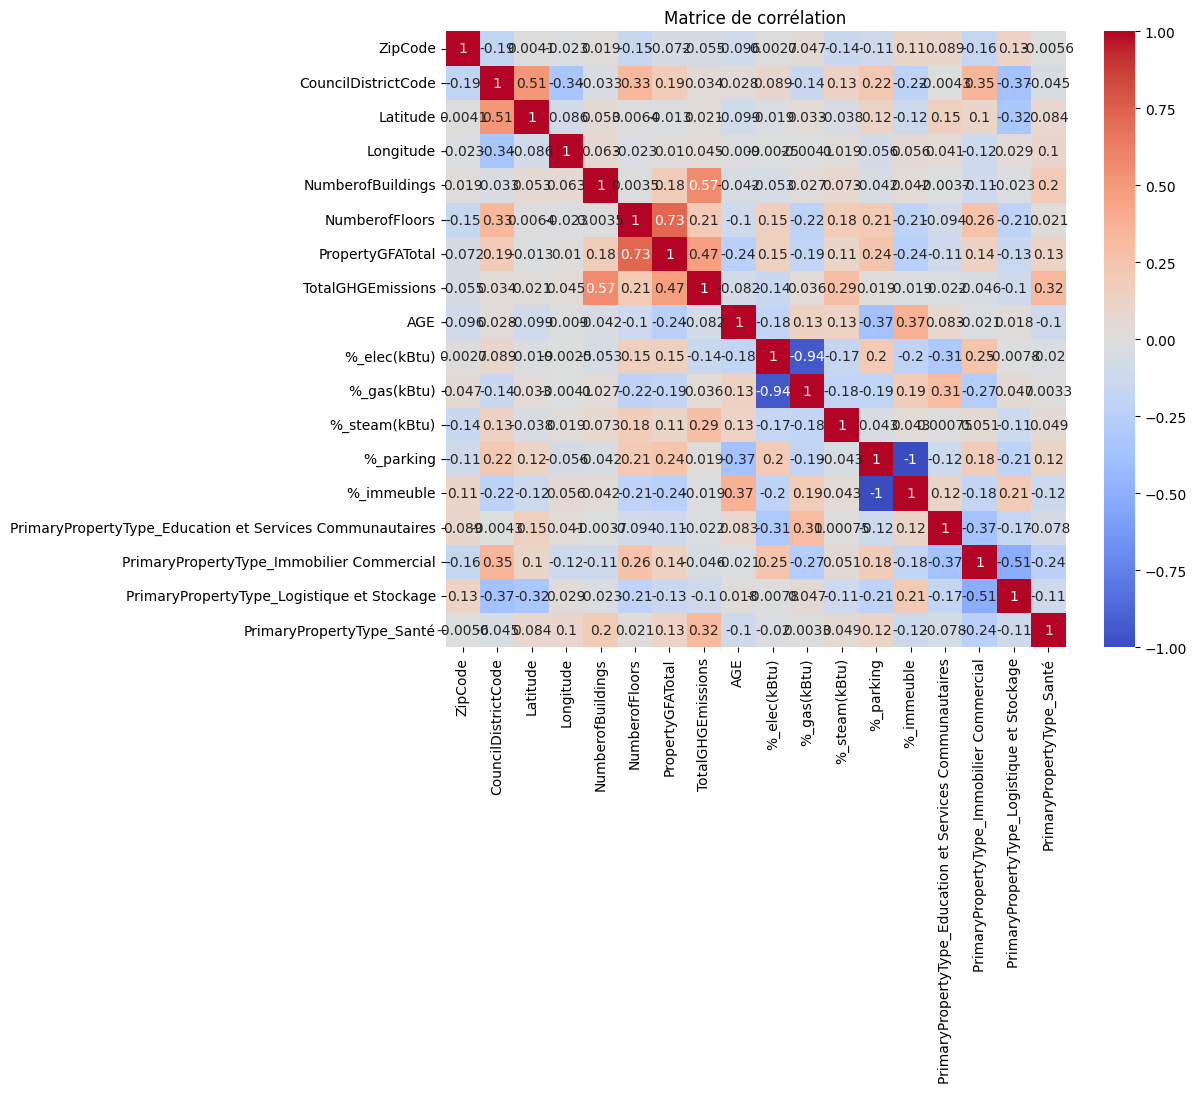

In [149]:

from scipy import stats



data=DF_cleaned_lineaire[col_num]


# 1. Analyse des corrélations
print("1. Analyse des corrélations")
correlations = data[col_num].corr()[TARGET].sort_values(ascending=False)
print("\nCorrélations avec SiteEnergyUse:")
print(correlations)

# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(data[col_num].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de corrélation')
plt.show()


In [150]:

# 2. Test de significativité individuelle
print("\n2. Tests de significativité individuelle")
X = sm.add_constant(data.drop([TARGET],axis=1))
model = sm.OLS(data[TARGET], X).fit()
print("\nRésumé des p-values:")
p_values = pd.DataFrame({
    'Variable': X.columns,
    'P-value': model.pvalues,
    'Significatif': model.pvalues < 0.05
}).sort_values('P-value')
print(p_values)



2. Tests de significativité individuelle

Résumé des p-values:
                                                                                             Variable  \
NumberofBuildings                                                                   NumberofBuildings   
PropertyGFATotal                                                                     PropertyGFATotal   
PrimaryPropertyType_Santé                                                   PrimaryPropertyType_Santé   
NumberofFloors                                                                         NumberofFloors   
ZipCode                                                                                       ZipCode   
PrimaryPropertyType_Immobilier Commercial                   PrimaryPropertyType_Immobilier Commercial   
%_steam(kBtu)                                                                           %_steam(kBtu)   
%_gas(kBtu)                                                                               %_gas(

In [151]:

# 3. Analyse VIF (Variance Inflation Factor)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

print("\n3. Analyse VIF (multicolinéarité)")
vif_data = calculate_vif(X.drop('const', axis=1))
print(vif_data)



3. Analyse VIF (multicolinéarité)
                                             Variable           VIF
12                                         %_immeuble  5.407995e+07
11                                          %_parking  1.582768e+06
9                                         %_gas(kBtu)  5.366714e+04
8                                        %_elec(kBtu)  5.349075e+04
10                                      %_steam(kBtu)  6.630645e+03
14          PrimaryPropertyType_Immobilier Commercial  2.603292e+00
5                                      NumberofFloors  2.551439e+00
6                                    PropertyGFATotal  2.470705e+00
15         PrimaryPropertyType_Logistique et Stockage  2.212836e+00
1                                 CouncilDistrictCode  2.149809e+00
13  PrimaryPropertyType_Education et Services Comm...  1.745933e+00
2                                            Latitude  1.625569e+00
16                          PrimaryPropertyType_Santé  1.376187e+00
7            

In [152]:

# 4. Analyse des R² ajustés avec différentes combinaisons
def evaluate_feature_importance(data):
    results = []
    base_features = []
    remaining_features = list(data.drop(TARGET, axis=1).columns)
    
    while remaining_features:
        best_score = -np.inf
        best_feature = None
        
        for feature in remaining_features:
            current_features = base_features + [feature]
            X = sm.add_constant(data[current_features])
            model = sm.OLS(data[TARGET], X).fit()
            score = model.rsquared_adj
            
            results.append({
                'features': ', '.join(current_features),
                'feature_added': feature,
                'r2_adj': score
            })
            
            if score > best_score:
                best_score = score
                best_feature = feature
        
        if best_feature:
            base_features.append(best_feature)
            remaining_features.remove(best_feature)
            
    return pd.DataFrame(results)

print("\n4. Analyse progressive des caractéristiques")
feature_importance = evaluate_feature_importance(data=data)
print(feature_importance.sort_values('r2_adj', ascending=False).head())



4. Analyse progressive des caractéristiques
                                              features feature_added    r2_adj
122  NumberofBuildings, PropertyGFATotal, %_steam(k...    %_immeuble  0.569931
108  NumberofBuildings, PropertyGFATotal, %_steam(k...       ZipCode  0.569931
129  NumberofBuildings, PropertyGFATotal, %_steam(k...  %_elec(kBtu)  0.569842
121  NumberofBuildings, PropertyGFATotal, %_steam(k...  %_elec(kBtu)  0.569842
128  NumberofBuildings, PropertyGFATotal, %_steam(k...           AGE  0.569815


In [153]:

# 5. Sélection finale des variables
def select_significant_variables(data, threshold_p_value=0.05, threshold_vif=125):
    # Première étape : sélection basée sur p-value
    X = sm.add_constant(data.drop([TARGET],axis=1))
    model = sm.OLS(data[TARGET], X).fit()
    significant_vars = X.columns[model.pvalues < threshold_p_value].tolist()
    
    
    
    # Deuxième étape : vérification VIF
    selected_vars = []
    X_significant = data[significant_vars]
    vif_data = calculate_vif(X_significant)
    
    for var in significant_vars:
        if vif_data[vif_data['Variable'] == var]['VIF'].values[0] < threshold_vif:
            selected_vars.append(var)
    #selected_vars.remove('const')
    return selected_vars

print("\n5. Sélection finale des variables")
selected_vars = select_significant_variables(data)
print("\nVariables sélectionnées:")
print(selected_vars)



5. Sélection finale des variables

Variables sélectionnées:
['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PrimaryPropertyType_Santé']


In [154]:

# Modèle final avec les variables sélectionnées
X_final = sm.add_constant(data[selected_vars])
final_model = sm.OLS(data[TARGET], X_final).fit()
print("\nRésumé du modèle final:")
print(final_model.summary())


Résumé du modèle final:
                            OLS Regression Results                            
Dep. Variable:      TotalGHGEmissions   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     361.8
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          5.59e-215
Time:                        21:19:58   Log-Likelihood:                -10640.
No. Observations:                1428   AIC:                         2.129e+04
Df Residuals:                    1423   BIC:                         2.132e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [155]:
col_num_sel_lin=selected_vars
print(col_num_sel_lin)

['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PrimaryPropertyType_Santé']


### vERIFICATION DES CORRELATIONS

In [156]:
def check_correlations(data, threshold=0.95):
    corr_matrix = data.corr().abs()
    high_corr = np.where(abs(corr_matrix) > threshold)
    pairs = [(data.columns[i], data.columns[j], corr_matrix.iloc[i,j]) 
             for i, j in zip(*high_corr) if i < j]
    if pairs:
        print("Attention : Fortes corrélations détectées")
        for var1, var2, corr in pairs:
            print(f"{var1} - {var2}: {corr:.3f}")
    return pairs

print('Voilà les features qui semblent corrélées entre elles :')
check_correlations(DF_cleaned_lineaire[col_num_sel_lin])

Voilà les features qui semblent corrélées entre elles :


[]

# 'TotalGHGEmissions'

### DUMMY

In [157]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X=DF_cleaned_lineaire[col_num_sel_lin]
y=DF_cleaned_lineaire[TARGET]

#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un Dummy Regressor qui prédit la moyenne
dummy_reg = DummyRegressor(strategy="mean")

# Entraîner le modèle
dummy_reg.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_dummy = dummy_reg.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse = mean_squared_error(y_test, y_pred_dummy)

print(f"Mean Squared Error: {mse}")

# Calculer la racine de l'erreur quadratique moyenne (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Calculer le coefficient de détermination R²
r2 = r2_score(y_test, y_pred_dummy)
print(f"R² Score: {r2}")


Mean Squared Error: 61448.32320984599
Root Mean Squared Error: 247.8877229913696
R² Score: -0.04878168995166421


### REGRESSION LINEAIRE AVEC SEULEMENT LES VARIABLES IMPORTANTES

In [158]:

X_test,y_test,y_pred_linear,y_pred_linear_train,y_pred_linear_general,mse_normale,r2_normal,mape_normal,\
    mae_normal,reglin=\
reg_lin(DF_cleaned_lineaire,col_num_sel_lin,TARGET,'RAS','None')

Linear Regression R² Score test: -0.14
Linear Regression MSE test: 6.66e+04
Linear Regression MAE test: 1.34e+02
Linear Regression MAPE test: 301.93 %
Linear Regression R² Score train: 0.53
Linear Regression MSE train: 1.97e+05
Linear Regression MAE train: 1.74e+02
Linear Regression MAPE train: 361.51 %
Linear Regression R² Score general: 0.51
Linear Regression MSE general: 1.71e+05
Linear Regression MAE general: 1.66e+02
Linear Regression MAPE general: 349.57 %


### REPRESENTATION

Représentation des prédictions linéaires et des prédictions dummy


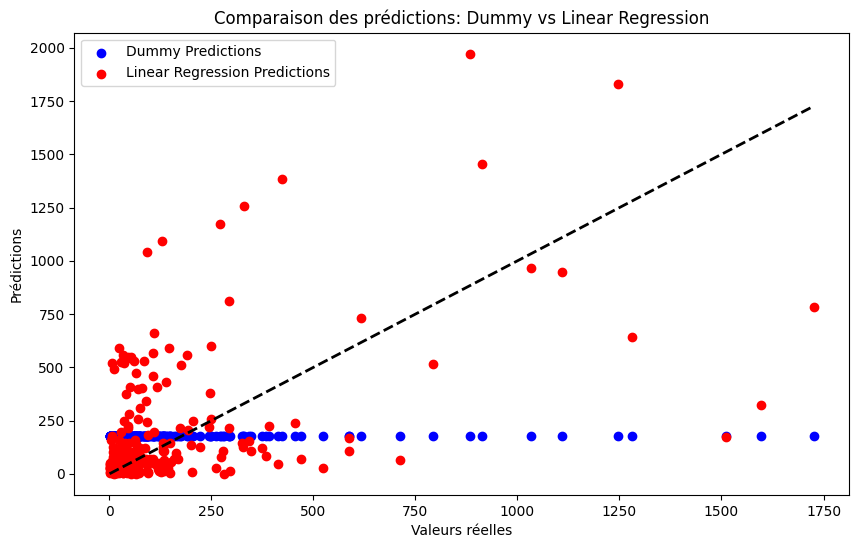

In [159]:
representation_predictions(y_test,y_pred_dummy,y_pred_linear)

# ON CONTINUE LA VERIFICATION DES HYPOTHESES DE LA REGRESSION LINEAIRE


0) Plot des résidus vs valeurs prédites


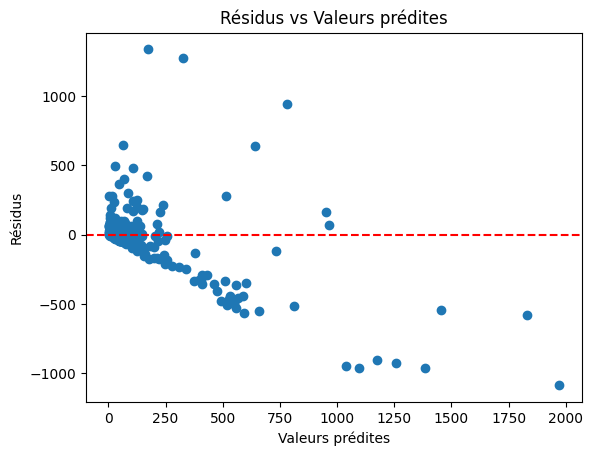


1) Indépendance des résidus (Test de Durbin-Watson)
Durbin-Watson test: 1.9257480887789615
Plutot bon

2) Etude de l'homoscedasticité
Statistiques du test de Breusch-Pagan:
p-value : 0.0000
statistique de test : 113.8463
Il y a de l'hétéroscédasticité (rejet de H0)

3) QQ-plot


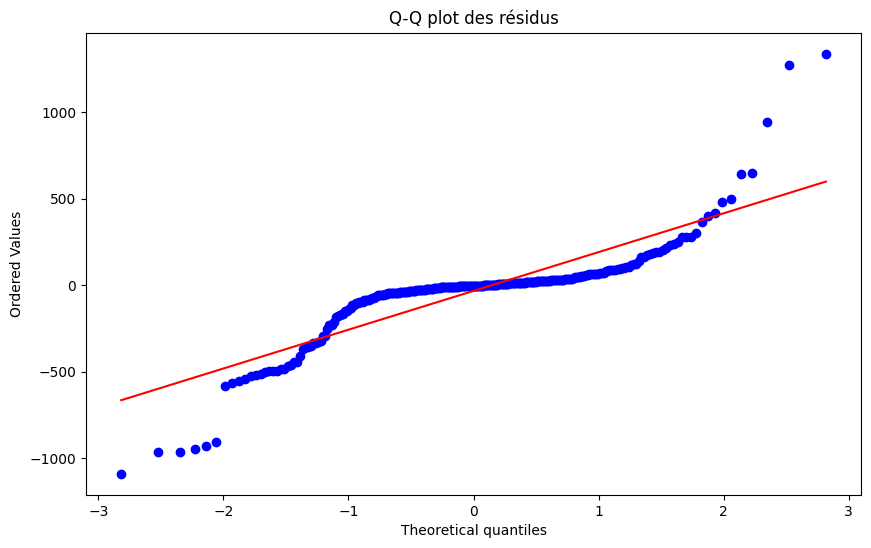

p-value du test Shapiro-Wilk : 4.7740908135528785e-20
résidus non normaux

4) Etude des valeurs aberrantes (Distance de Cook)


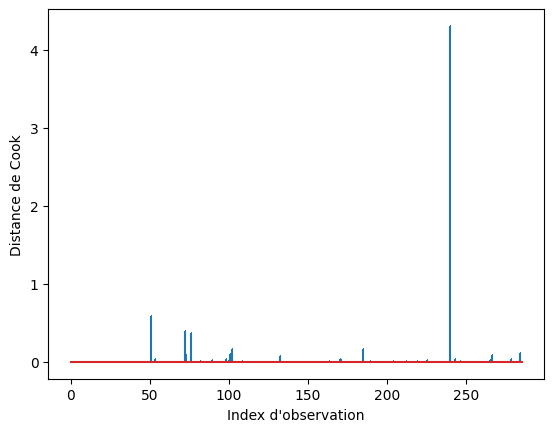

In [160]:
suite_hypothéses(X_test,y_test,y_pred_linear)

In [161]:
DF_cleaned_lineaire[TARGET].min()

0.4

# ON VA MAINTENANT LOG LA VARIABLE CIBLE

In [162]:
X_test,y_test,y_pred_linear,y_pred_linear_train,y_pred_linear_general,mse_log_target,r2_log_target,\
    mape_log_target,mae_log_target,reglin=\
reg_lin(DF_cleaned_lineaire,col_num_sel_lin,TARGET,'log_target','None')

Linear Regression R² Score test: -237.79
Linear Regression MSE test: 1.40e+07
Linear Regression MAE test: 3.09e+02
Linear Regression MAPE test: 212.53 %
Linear Regression R² Score train: -10.53
Linear Regression MSE train: 4.87e+06
Linear Regression MAE train: 2.34e+02
Linear Regression MAPE train: 209.75 %
Linear Regression R² Score general: -18.14
Linear Regression MSE general: 6.70e+06
Linear Regression MAE general: 2.49e+02
Linear Regression MAPE general: 210.31 %


Représentation des prédictions linéaires et des prédictions dummy


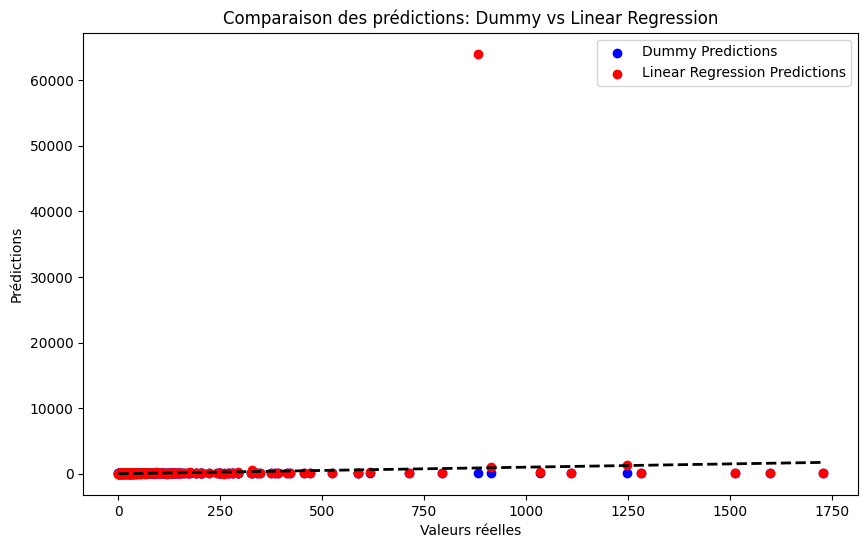

In [163]:
representation_predictions(y_test,y_pred_dummy,y_pred_linear)

LES RESULTATS SONT TRES MAUVAIS AVEC CETTE APPROCHE

# ON VA MAINTENANT LOG LA VARIABLE PropertyGFATotal EN PLUS DE LA CIBLE


In [164]:
X_test,y_test,y_pred_linear,y_pred_linear_train,y_pred_linear_general,mse_log_target_feature,\
    r2_log_target_feature,mape_log_target_feature,mae_log_target_feature,reglin=\
reg_lin(DF_cleaned_lineaire,col_num_sel_lin,TARGET,'log_target_feature','PropertyGFATotal')

Linear Regression R² Score test: 0.30
Linear Regression MSE test: 4.09e+04
Linear Regression MAE test: 8.79e+01
Linear Regression MAPE test: 158.90 %
Linear Regression R² Score train: 0.67
Linear Regression MSE train: 1.41e+05
Linear Regression MAE train: 1.21e+02
Linear Regression MAPE train: 168.38 %
Linear Regression R² Score general: 0.65
Linear Regression MSE general: 1.21e+05
Linear Regression MAE general: 1.15e+02
Linear Regression MAPE general: 166.48 %


Représentation des prédictions linéaires et des prédictions dummy


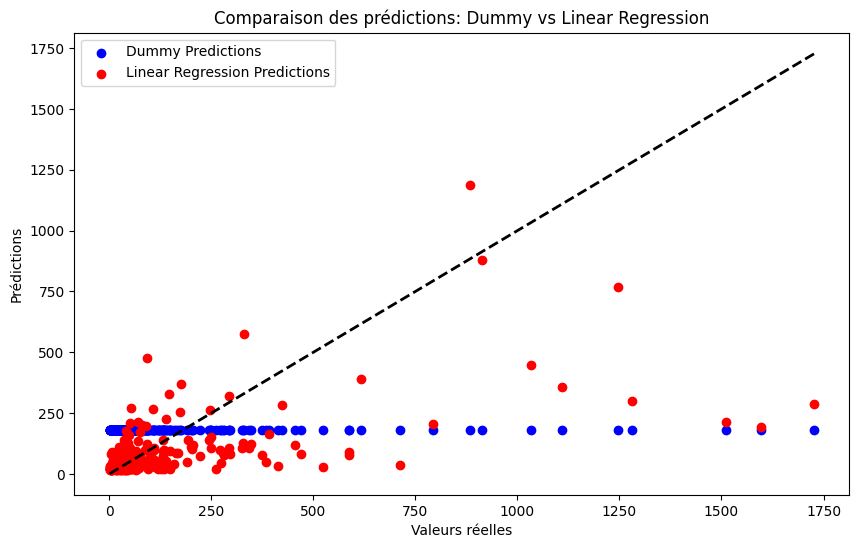

In [165]:
representation_predictions(y_test,y_pred_dummy,y_pred_linear)

0) Plot des résidus vs valeurs prédites


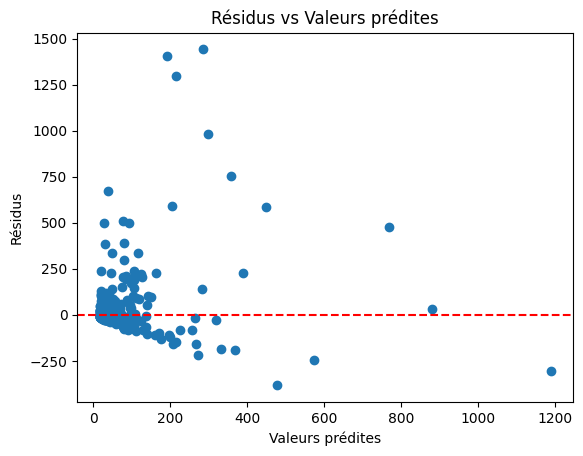


1) Indépendance des résidus (Test de Durbin-Watson)
Durbin-Watson test: 1.8171967991213092
Plutot bon

2) Etude de l'homoscedasticité
Statistiques du test de Breusch-Pagan:
p-value : 0.0000
statistique de test : 29.7805
Il y a de l'hétéroscédasticité (rejet de H0)

3) QQ-plot


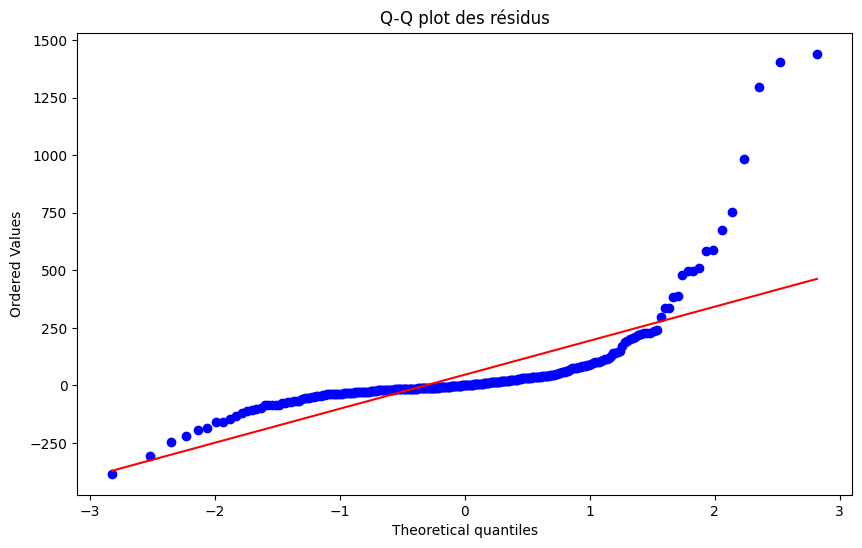

p-value du test Shapiro-Wilk : 3.685377705259462e-26
résidus non normaux

4) Etude des valeurs aberrantes (Distance de Cook)


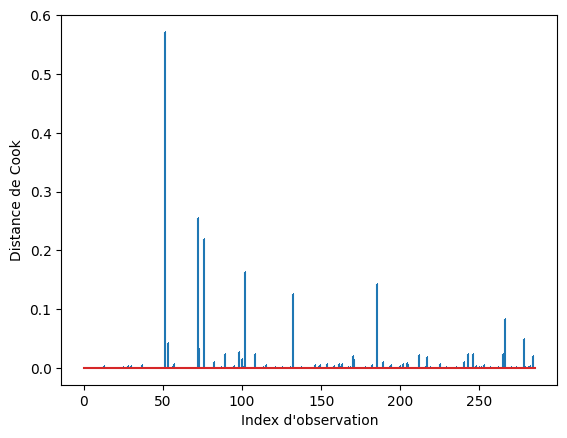

In [166]:
suite_hypothéses(X_test,y_test,y_pred_linear)

In [167]:
nouvelle_ligne=r2_log_target_feature.to_frame().T
nouvelle_ligne.index=['Reg_lin']

Tableau_score_r2=pd.concat([Tableau_score_r2,nouvelle_ligne])

nouvelle_ligne=mae_log_target_feature.to_frame().T
nouvelle_ligne.index=['Reg_lin']

Tableau_score_mae=pd.concat([Tableau_score_mae,nouvelle_ligne])

nouvelle_ligne=mape_log_target_feature.to_frame().T
nouvelle_ligne.index=['Reg_lin']

Tableau_score_mape=pd.concat([Tableau_score_mape,nouvelle_ligne])

nouvelle_ligne=mse_log_target_feature.to_frame().T
nouvelle_ligne.index=['Reg_lin']

Tableau_score_mse=pd.concat([Tableau_score_mse,nouvelle_ligne])

nouvelle_ligne=pd.Series([len(col_num_sel_lin)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['Reg_lin']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])


# REGRESSION REGULARISEE

In [168]:
col_num=list(DF_cleaned_lineaire[col_num].columns)

del(col_num[col_num.index(TARGET)])
print(col_num)

['ZipCode', 'CouncilDistrictCode', 'Latitude', 'Longitude', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'AGE', '%_elec(kBtu)', '%_gas(kBtu)', '%_steam(kBtu)', '%_parking', '%_immeuble', 'PrimaryPropertyType_Education et Services Communautaires', 'PrimaryPropertyType_Immobilier Commercial', 'PrimaryPropertyType_Logistique et Stockage', 'PrimaryPropertyType_Santé']


## REGRESSION AVEC TOUTES LES FEATURES

In [169]:
ridge,lasso,elastic,resultats,y_test,y_pred_elastic,scl=reg_regul(DF_cleaned_lineaire,col_num,
                                                              TARGET,type='RAS',log_feature=['None'])


Comparaison des coefficients:
                                                         Ridge       Lasso  \
PropertyGFATotal                                    335.693194  332.921183   
NumberofBuildings                                   278.072760  277.973805   
%_steam(kBtu)                                       139.696308  133.247205   
PrimaryPropertyType_Santé                           109.639694  107.875650   
NumberofFloors                                     -133.639019 -130.411918   
%_elec(kBtu)                                        -61.221798  -76.853743   
%_parking                                           -20.786169  -39.769129   
PrimaryPropertyType_Immobilier Commercial            26.562300   23.192460   
AGE                                                 -18.156112  -16.370837   
PrimaryPropertyType_Logistique et Stockage          -10.949781  -11.168684   
ZipCode                                             -15.236142  -13.844699   
%_immeuble                       

<Figure size 1200x600 with 0 Axes>

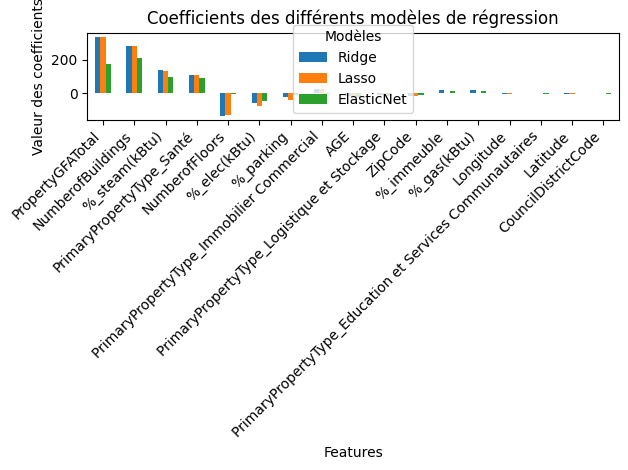


Variables sélectionnées par Lasso (coefficients non nuls):
                                              Feature  Coefficient
6                                    PropertyGFATotal   332.921183
4                                   NumberofBuildings   277.973805
10                                      %_steam(kBtu)   133.247205
5                                      NumberofFloors  -130.411918
16                          PrimaryPropertyType_Santé   107.875650
8                                        %_elec(kBtu)   -76.853743
11                                          %_parking   -39.769129
14          PrimaryPropertyType_Immobilier Commercial    23.192460
7                                                 AGE   -16.370837
0                                             ZipCode   -13.844699
15         PrimaryPropertyType_Logistique et Stockage   -11.168684
3                                           Longitude    -5.984879
2                                            Latitude    -4.504850
13

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X=DF_cleaned_lineaire[col_num]

# Création d'un DataFrame pour comparer les coefficients des différents modèles
def compare_coefficients(models, model_names, feature_names):
    coefficients = pd.DataFrame()
    for model, name in zip(models, model_names):
        coefficients[name] = model.coef_
    coefficients.index = feature_names
    
    # Trier par valeur absolue des coefficients (moyenne des 3 modèles)
    coefficients['Moyenne_Abs'] = coefficients.abs().mean(axis=1)
    coefficients = coefficients.sort_values('Moyenne_Abs', ascending=False)
    
    print("\nComparaison des coefficients:")
    print(coefficients)
    
    # Visualisation
    plt.figure(figsize=(12, 6))
    coefficients[model_names].plot(kind='bar')
    plt.title('Coefficients des différents modèles de régression')
    plt.xlabel('Features')
    plt.ylabel('Valeur des coefficients')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Modèles')
    plt.tight_layout()
    plt.show()
    
    return coefficients

# Utilisation de la fonction
models = [ridge, lasso, elastic]
model_names = ['Ridge', 'Lasso', 'ElasticNet']
coef_comparison = compare_coefficients(models, model_names, X.columns)

# Analyse spécifique pour Lasso (sélection de variables)
print("\nVariables sélectionnées par Lasso (coefficients non nuls):")
lasso_selected = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lasso.coef_
})
lasso_selected = lasso_selected[lasso_selected['Coefficient'] != 0]
lasso_selected = lasso_selected.sort_values('Coefficient', key=abs, ascending=False)
print(lasso_selected)


Features importantes (importance > 0.01):
                                                       Ridge     Lasso  \
PropertyGFATotal                                    1.000000  1.000000   
NumberofBuildings                                   0.828354  0.834954   
%_steam(kBtu)                                       0.416143  0.400236   
PrimaryPropertyType_Santé                           0.326607  0.324028   
NumberofFloors                                      0.398099  0.391720   
%_elec(kBtu)                                        0.182374  0.230847   
%_parking                                           0.061920  0.119455   
AGE                                                 0.054085  0.049173   
PrimaryPropertyType_Immobilier Commercial           0.079127  0.069664   
PrimaryPropertyType_Logistique et Stockage          0.032618  0.033548   
ZipCode                                             0.045387  0.041586   
%_immeuble                                          0.061920  0.00000

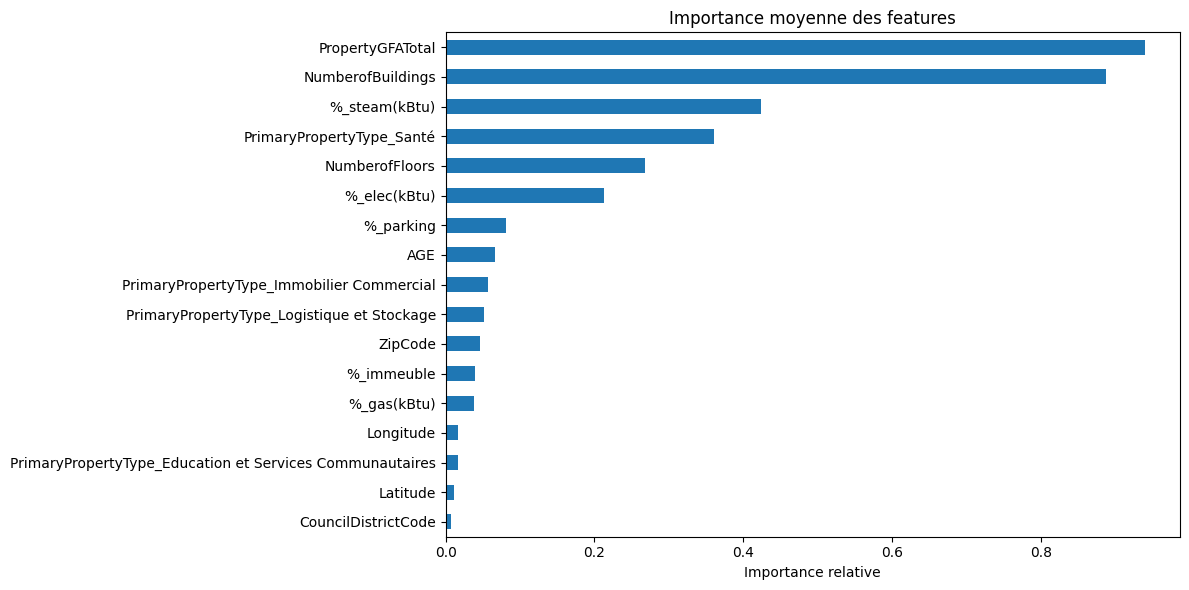

In [171]:
def analyze_feature_importance(models, model_names, feature_names, threshold=0.01):
    importance_summary = pd.DataFrame()
    
    for model, name in zip(models, model_names):
        # Normaliser les coefficients
        normalized_coef = np.abs(model.coef_) / np.abs(model.coef_).max()
        importance_summary[name] = normalized_coef
    
    importance_summary.index = feature_names
    
    # Calculer le score moyen d'importance
    importance_summary['Importance_moyenne'] = importance_summary.mean(axis=1)
    
    # Identifier les features importantes
    important_features = importance_summary[
        importance_summary['Importance_moyenne'] > threshold
    ].sort_values('Importance_moyenne', ascending=False)
    
    print("\nFeatures importantes (importance > {}):".format(threshold))
    print(important_features)
    col_num_sel=list(important_features.head(6).index)
    # Visualisation
    plt.figure(figsize=(12, 6))
    importance_summary['Importance_moyenne'].sort_values().plot(kind='barh')
    plt.title('Importance moyenne des features')
    plt.xlabel('Importance relative')
    plt.tight_layout()
    plt.show()
    
    return importance_summary,list(col_num_sel)

# Utilisation de la fonction
importance_analysis,col_num_sel_regu = analyze_feature_importance(models, model_names, X.columns)

## REGRESSION REGULARISEE AVEC LES 6 MEILLEURES COLONNES

In [172]:
print(col_num_sel_regu)

['PropertyGFATotal', 'NumberofBuildings', '%_steam(kBtu)', 'PrimaryPropertyType_Santé', 'NumberofFloors', '%_elec(kBtu)']


In [173]:
ridge,lasso,elastic,resultats,y_test,y_pred_elastic,scl=reg_regul(DF_cleaned_lineaire,col_num_sel_regu,
                                                              TARGET,
                                 type='RAS',log_feature=['None'],alpha=1.0,l1_ratio=0.5)

## REGRESSION REGULARISEE AVEC LOG TARGET ET FEATURE

In [174]:
ridge,lasso,elastic_log,resultats,y_test,y_pred_elastic,scl_log_ela_X=\
    reg_regul(DF_cleaned_lineaire,col_num_sel_regu,TARGET,type='log_target_feature',
              log_feature=['PropertyGFATotal'],alpha=0.01,l1_ratio=0.4)

## RESUME DES RESULTATS

In [175]:
resultats

,train,test,general
mae_ElasticNet_log_target_feature,8.64e+01,6.22e+01,8.15e+01
mae_Lasso_log_target_feature,8.65e+01,6.18e+01,8.16e+01
mae_Ridge_log_target_feature,8.61e+01,6.24e+01,8.14e+01
mape_ElasticNet_log_target_feature,83.29,82.59,83.15
mape_Lasso_log_target_feature,83.47,82.74,83.32
mape_Ridge_log_target_feature,83.10,82.61,83.00
mse_ElasticNet_log_target_feature,9.85e+04,1.80e+04,8.23e+04
mse_Lasso_log_target_feature,8.71e+04,1.78e+04,7.32e+04
mse_Ridge_log_target_feature,1.13e+05,1.82e+04,9.39e+04
r2_ElasticNet_log_target_feature,0.77,0.69,0.76


In [176]:
nouvelle_ligne=resultats.loc['mae_ElasticNet_log_target_feature']
nouvelle_ligne=nouvelle_ligne.to_frame().T
nouvelle_ligne.index=['ElasticNet']

Tableau_score_mae=pd.concat([Tableau_score_mae,nouvelle_ligne])

nouvelle_ligne=resultats.loc['mape_ElasticNet_log_target_feature']
nouvelle_ligne=nouvelle_ligne.to_frame().T
nouvelle_ligne.index=['ElasticNet']

Tableau_score_mape=pd.concat([Tableau_score_mape,nouvelle_ligne])

nouvelle_ligne=resultats.loc['mse_ElasticNet_log_target_feature']
nouvelle_ligne=nouvelle_ligne.to_frame().T
nouvelle_ligne.index=['ElasticNet']

Tableau_score_mse=pd.concat([Tableau_score_mse,nouvelle_ligne])

nouvelle_ligne=resultats.loc['r2_ElasticNet_log_target_feature']
nouvelle_ligne=nouvelle_ligne.to_frame().T
nouvelle_ligne.index=['ElasticNet']

Tableau_score_r2=pd.concat([Tableau_score_r2,nouvelle_ligne])

nouvelle_ligne=pd.Series([len(col_num_sel_regu)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['Elastic Net']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

## AFFICHAGE DES PREDICTIONS

Représentation des prédictions linéaires et des prédictions dummy


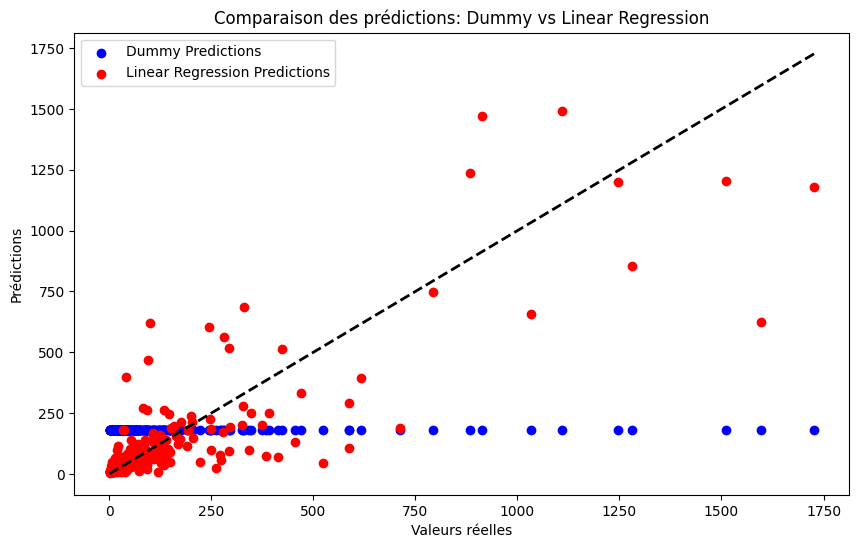

In [177]:
representation_predictions(y_test,y_pred_dummy,y_pred_elastic)

# DECISION TREE REGRESSOR

Score R² train : 0.60
Score R² test : 0.53
Score MAE train : 1.09e+02
Score MAE test : 7.63e+01
Score MAPE train : 173.83 %
Score MAPE test : 153.21 %
Score MSE train : 1.69e+05
Score MSE test : 2.78e+04


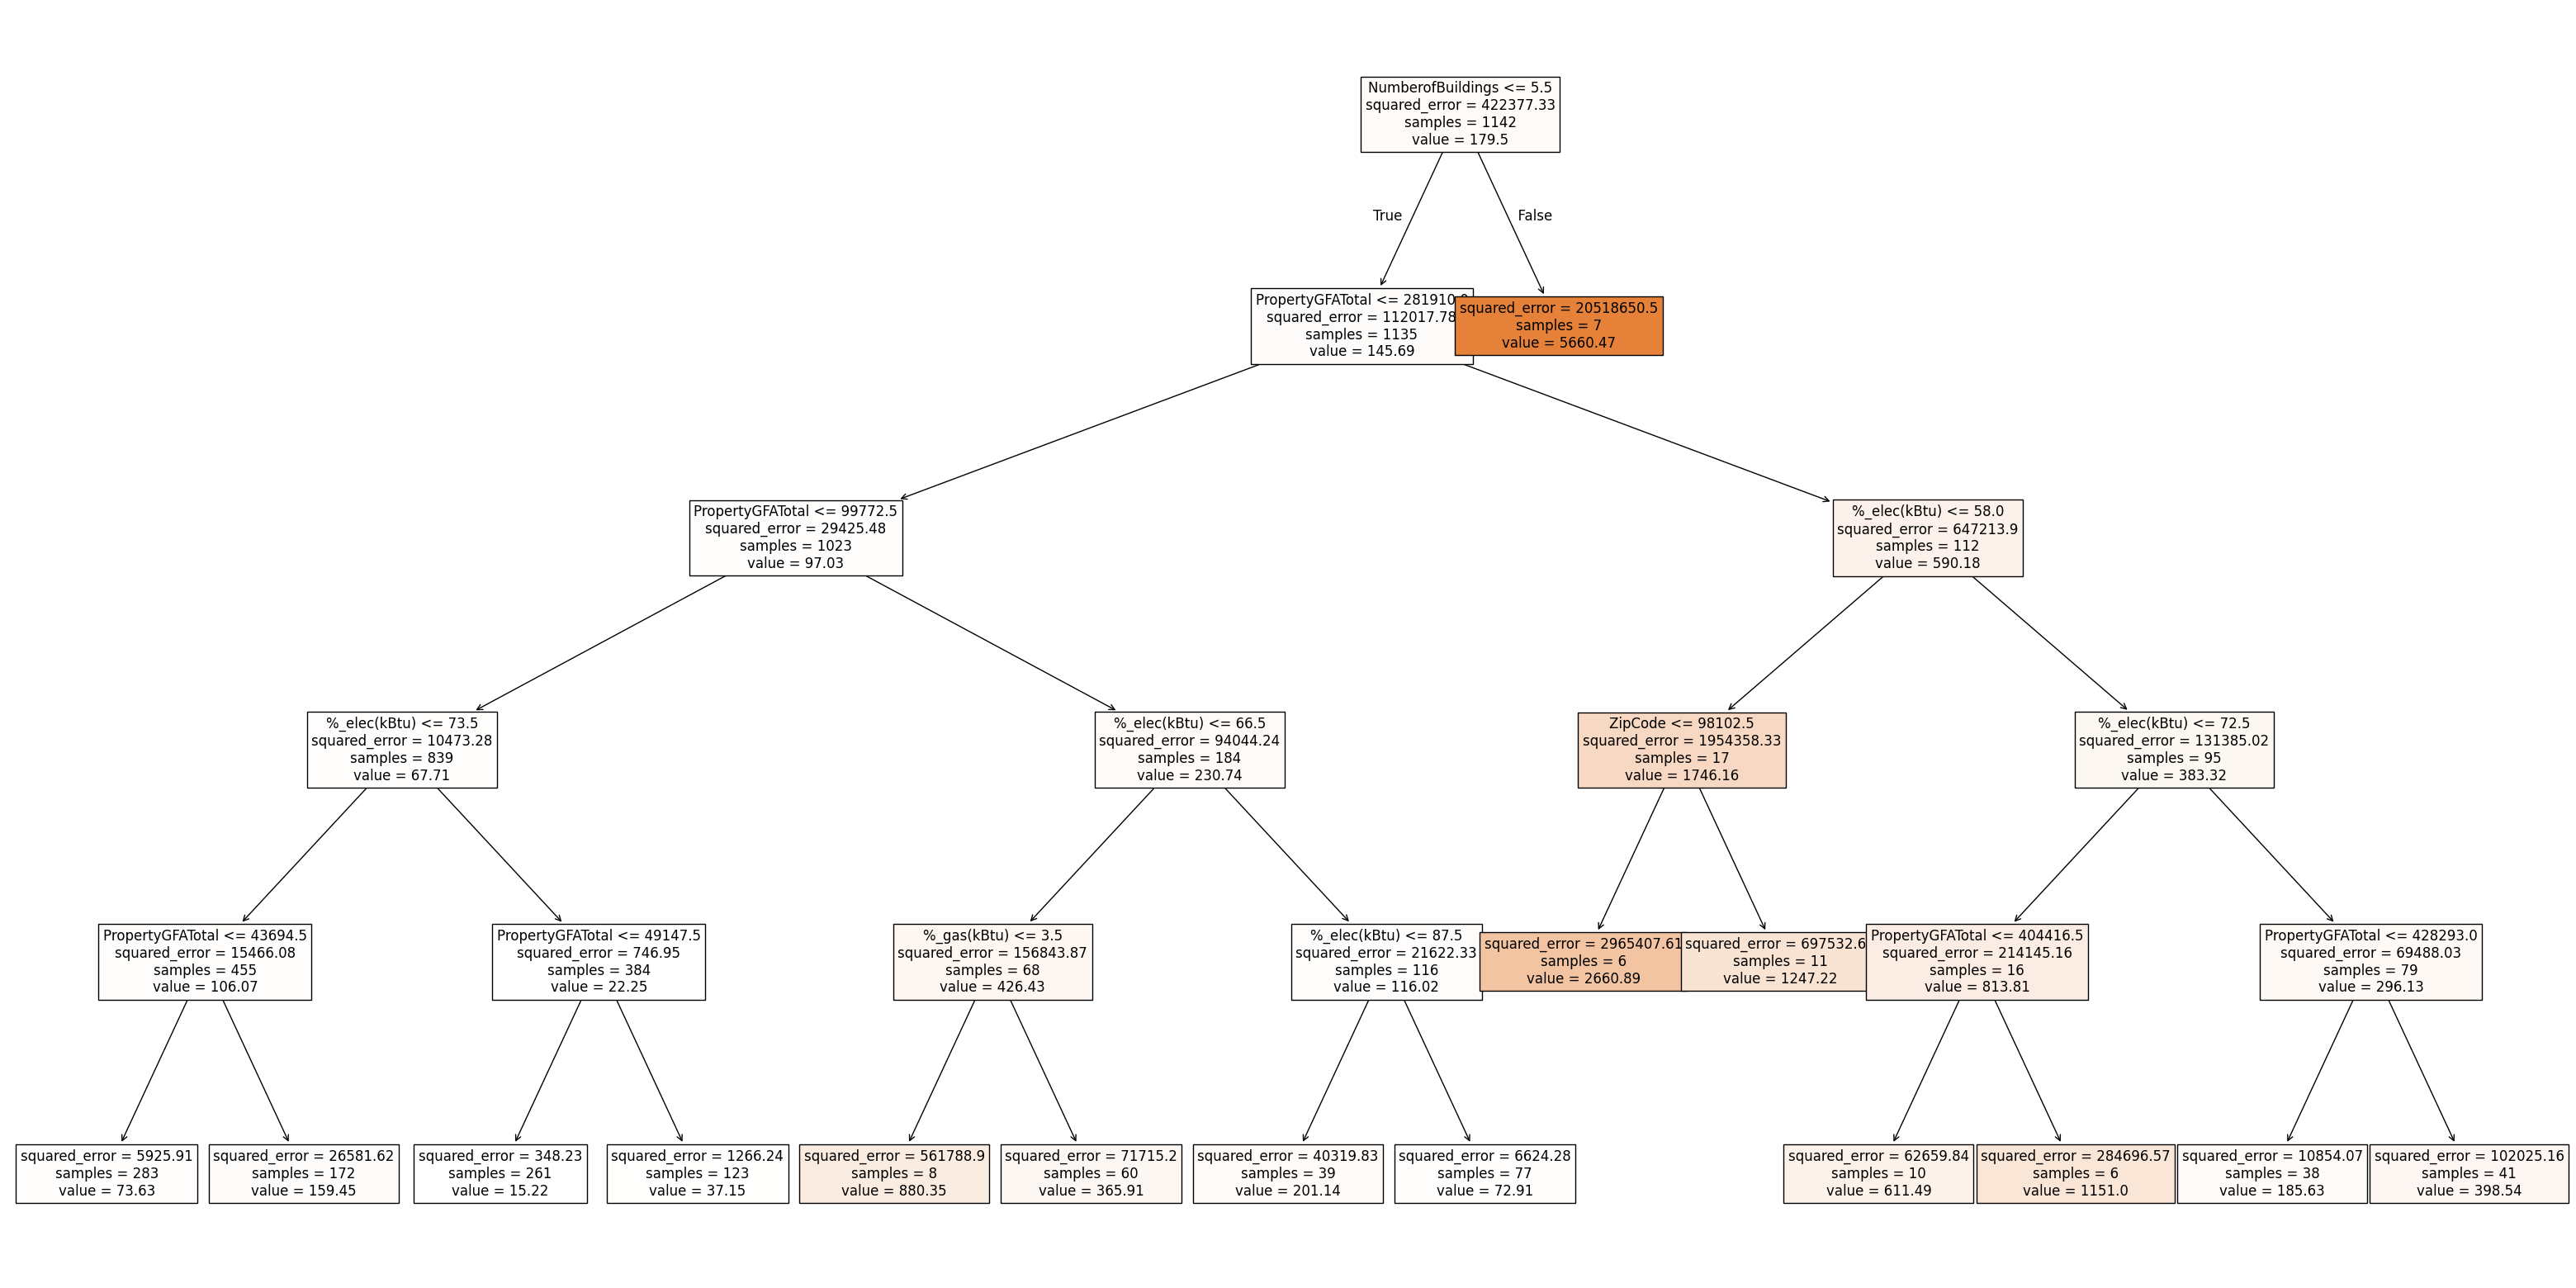

In [178]:
dt_reg,MAE,MAPE,MSE,R2=decision_tree_regressor(DF_cleaned,col_num,TARGET,'RAS',['None'],
                                               Tableau_score_mae,Tableau_score_mape,
                                               Tableau_score_mse,Tableau_score_r2)

## FEATURE IMPORTANCE

In [179]:
from sklearn.model_selection import train_test_split

X=DF_cleaned[col_num]
y=DF_cleaned[TARGET]



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# Récupérer directement les importances et les noms des features
importances = dt_reg.feature_importances_
feature_names = X_train.columns

# Créer un dictionnaire simple
importances_dict = dict(zip(feature_names, importances))

# Trier par importance décroissante
sorted_importances = dict(sorted(importances_dict.items(), key=lambda x: x[1], reverse=True))

col_num_sel_dt=[]

# Afficher les résultats
for feature, importance in sorted_importances.items():
    print(f"{feature}: {importance:.4f}")
    if importance>0.0 and feature not in ['AGE','OSEBuildingID']:
        col_num_sel_dt.append(feature)

NumberofBuildings: 0.7322
%_elec(kBtu): 0.1259
PropertyGFATotal: 0.1086
ZipCode: 0.0269
%_gas(kBtu): 0.0065
CouncilDistrictCode: 0.0000
Latitude: 0.0000
Longitude: 0.0000
NumberofFloors: 0.0000
AGE: 0.0000
%_steam(kBtu): 0.0000
%_parking: 0.0000
%_immeuble: 0.0000
PrimaryPropertyType_Education et Services Communautaires: 0.0000
PrimaryPropertyType_Immobilier Commercial: 0.0000
PrimaryPropertyType_Logistique et Stockage: 0.0000
PrimaryPropertyType_Santé: 0.0000


In [180]:
print(col_num_sel_dt)

['NumberofBuildings', '%_elec(kBtu)', 'PropertyGFATotal', 'ZipCode', '%_gas(kBtu)']


## ESSAI AVEC LES FEATURE D'IMPORTANCE SUP A 0 ET EN LOGANT LA CIBLE ET PROPERTYGFA

Score R² train : 0.68
Score R² test : 0.55
Score MAE train : 9.33e+01
Score MAE test : 6.81e+01
Score MAPE train : 76.04 %
Score MAPE test : 85.69 %
Score MSE train : 1.34e+05
Score MSE test : 2.64e+04


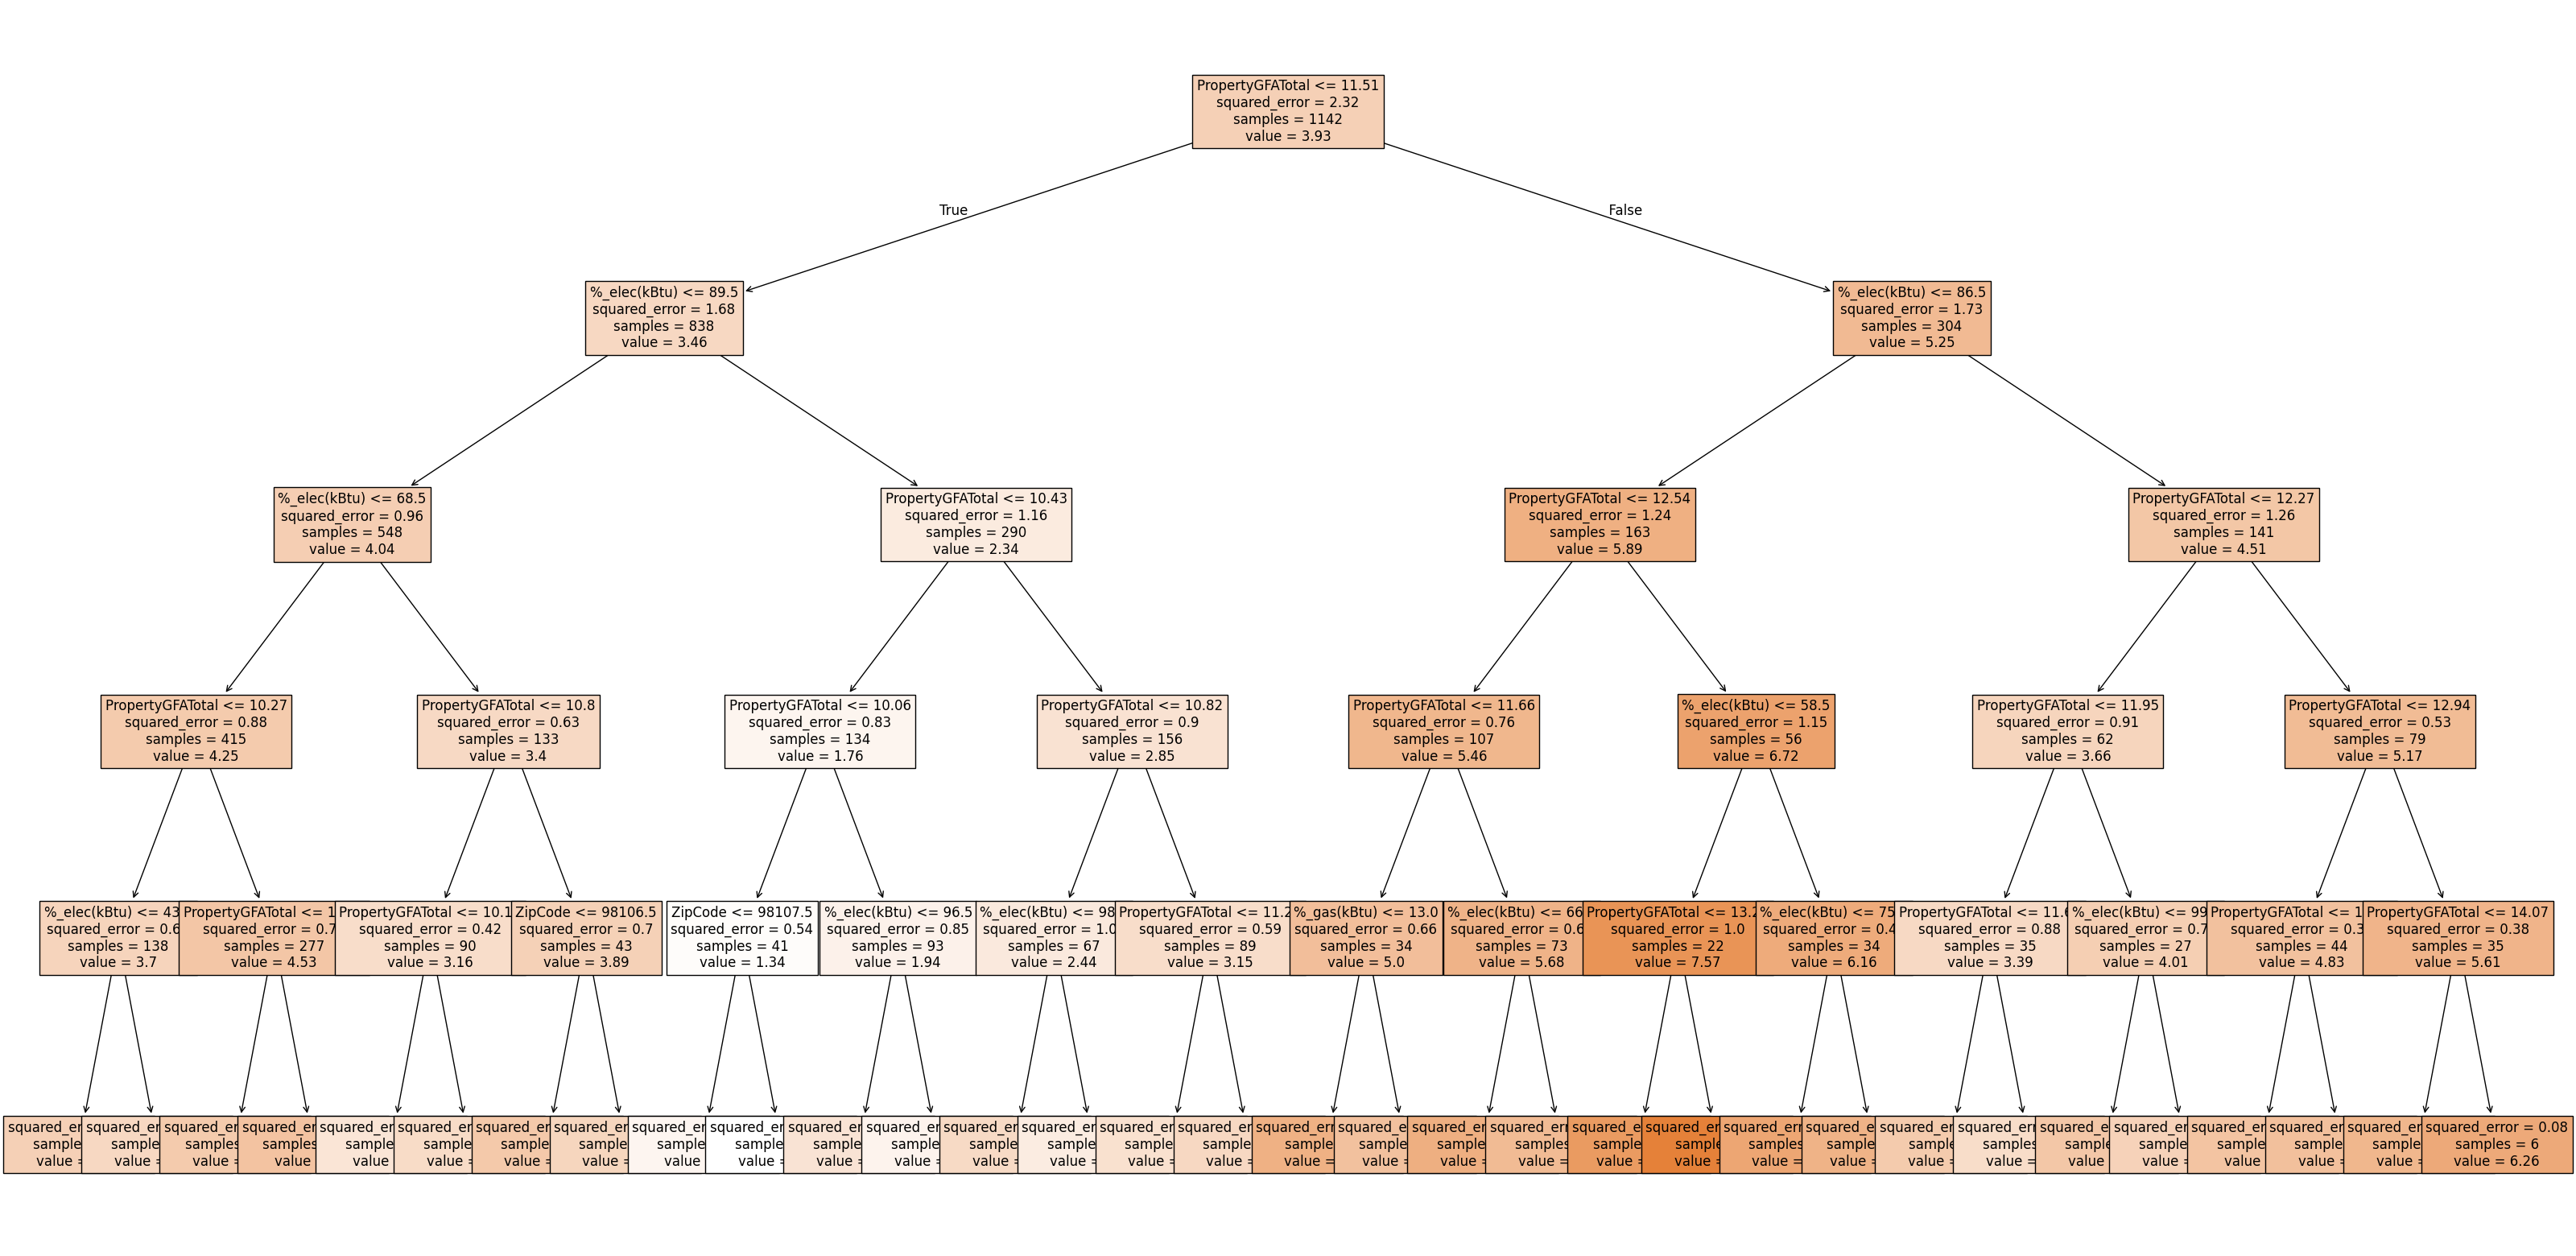

In [181]:
dtr,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2=\
    decision_tree_regressor(DF_cleaned,col_num_sel_dt,TARGET,'log_target_feature',['PropertyGFATotal'],
                            Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

In [182]:
nouvelle_ligne=pd.Series([len(col_num_sel_dt)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['Decision Tree']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

# RANDOM FOREST

In [183]:
rf_reg,MAE,MAPE,MSE,R2=random_forest(DF_cleaned,col_num,TARGET,'RAS',['None']
                     ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.63
Score R² test : 0.70
Score MAE train : 8.55e+01
Score MAE test : 6.54e+01
Score MAPE train : 101.45 %
Score MAPE test : 101.33 %
Score MSE train : 1.58e+05
Score MSE test : 1.76e+04


## PERMUTATION POUR FEATURE IMPORTANCE

In [184]:
from sklearn.inspection import permutation_importance

from sklearn.model_selection import train_test_split

X=DF_cleaned[col_num]
y=DF_cleaned[TARGET]




X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Calcul des permutation importances
result = permutation_importance(
   rf_reg, 
   X_test,  # On utilise le jeu de test pour éviter le biais
   y_test,
   n_repeats=10,  # Nombre de permutations à effectuer
   random_state=42
)

# Création d'un dictionnaire avec les importances moyennes
importances = result.importances_mean
feature_names = X_test.columns
importances_dict = dict(zip(feature_names, importances))

# Tri par importance décroissante
sorted_importances = dict(sorted(importances_dict.items(), key=lambda x: x[1], reverse=True))

col_num_sel_rf=[]

# Affichage des résultats avec les écarts-types
for feature, importance in sorted_importances.items():
   std = result.importances_std[list(feature_names).index(feature)]
   print(f"{feature}: {importance:.4f} (±{std:.4f})")
   if importance>0.004 and feature not in ['AGE','OSEBuildingID']:
      col_num_sel_rf.append(feature)

PropertyGFATotal: 1.4911 (±0.2105)
%_elec(kBtu): 0.8624 (±0.1710)
%_steam(kBtu): 0.0477 (±0.0202)
PrimaryPropertyType_Logistique et Stockage: 0.0083 (±0.0045)
%_gas(kBtu): 0.0074 (±0.0062)
NumberofFloors: 0.0048 (±0.0038)
ZipCode: 0.0029 (±0.0041)
PrimaryPropertyType_Immobilier Commercial: 0.0023 (±0.0010)
PrimaryPropertyType_Education et Services Communautaires: 0.0011 (±0.0004)
PrimaryPropertyType_Santé: 0.0009 (±0.0001)
CouncilDistrictCode: 0.0007 (±0.0018)
NumberofBuildings: 0.0005 (±0.0001)
%_immeuble: 0.0000 (±0.0010)
%_parking: -0.0001 (±0.0013)
Longitude: -0.0011 (±0.0021)
AGE: -0.0040 (±0.0071)
Latitude: -0.0053 (±0.0061)


In [185]:
print(col_num_sel_rf)

['PropertyGFATotal', '%_elec(kBtu)', '%_steam(kBtu)', 'PrimaryPropertyType_Logistique et Stockage', '%_gas(kBtu)', 'NumberofFloors']


## ESSAI AVEC LES FEATURES LES PLUS PERTINENTES + LOG

In [186]:
rfreg,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2=\
random_forest(DF_cleaned,col_num_sel_rf,TARGET,'log_target_feature',['PropertyGFATotal']
              ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.57
Score R² test : 0.64
Score MAE train : 7.93e+01
Score MAE test : 6.20e+01
Score MAPE train : 47.94 %
Score MAPE test : 66.41 %
Score MSE train : 1.82e+05
Score MSE test : 2.12e+04


In [187]:
nouvelle_ligne=pd.Series([len(col_num_sel_rf)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['Random Forest']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

# GRADIENT BOOSTING 

In [188]:
gb_reg,MAE,MAPE,MSE,R2=gradient_boosting(DF_cleaned,col_num,TARGET,'RAS',['None']
                         ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.81
Score R² test : 0.58
Score MAE train : 1.00e+02
Score MAE test : 7.92e+01
Score MAPE train : 215.22 %
Score MAPE test : 198.09 %
Score MSE train : 8.23e+04
Score MSE test : 2.48e+04


## PERMUTATION POUR FEATURE IMPORTANCE

In [189]:
from sklearn.inspection import permutation_importance

X=DF_cleaned[col_num]
y=DF_cleaned[TARGET]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Calcul des permutation importances pour le Gradient Boosting
result = permutation_importance(
   gb_reg, 
   X_test,
   y_test,
   n_repeats=10,
   random_state=42
)

# Création d'un dictionnaire avec les importances moyennes
importances = result.importances_mean
feature_names = X_test.columns
importances_dict = dict(zip(feature_names, importances))

# Tri par importance décroissante
sorted_importances = dict(sorted(importances_dict.items(), key=lambda x: x[1], reverse=True))

col_num_sel_gb=[]

# Affichage des résultats avec les écarts-types
for feature, importance in sorted_importances.items():
   std = result.importances_std[list(feature_names).index(feature)]
   print(f"{feature}: {importance:.4f} (±{std:.4f})")
   if importance>0.01 and feature not in['AGE','OSEBuildingID']:
      col_num_sel_gb.append(feature)

PropertyGFATotal: 1.3726 (±0.3819)
%_elec(kBtu): 0.6147 (±0.2219)
%_steam(kBtu): 0.2564 (±0.0969)
PrimaryPropertyType_Santé: 0.0203 (±0.0700)
Longitude: 0.0122 (±0.0195)
NumberofFloors: 0.0105 (±0.0049)
AGE: 0.0064 (±0.0039)
%_gas(kBtu): 0.0039 (±0.0014)
PrimaryPropertyType_Logistique et Stockage: 0.0005 (±0.0004)
%_immeuble: 0.0003 (±0.0001)
CouncilDistrictCode: 0.0000 (±0.0000)
Latitude: 0.0000 (±0.0000)
%_parking: 0.0000 (±0.0000)
PrimaryPropertyType_Education et Services Communautaires: 0.0000 (±0.0000)
PrimaryPropertyType_Immobilier Commercial: 0.0000 (±0.0000)
ZipCode: -0.0003 (±0.0006)
NumberofBuildings: -0.0042 (±0.0064)


In [190]:
print(col_num_sel_gb)

['PropertyGFATotal', '%_elec(kBtu)', '%_steam(kBtu)', 'PrimaryPropertyType_Santé', 'Longitude', 'NumberofFloors']


## ESSAI AVEC SEULEMENT LES FEATURES QUI DEPASSENT 1% + LOG

In [191]:
gbreg,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2=\
    gradient_boosting(DF_cleaned,col_num_sel_gb,TARGET,'log_target_feature',['PropertyGFATotal']
                  ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.82
Score R² test : 0.67
Score MAE train : 7.51e+01
Score MAE test : 6.20e+01
Score MAPE train : 66.62 %
Score MAPE test : 72.03 %
Score MSE train : 7.52e+04
Score MSE test : 1.92e+04


In [192]:
nouvelle_ligne=pd.Series([len(col_num_sel_gb)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['Gradient Boosting']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

# XGBoost

In [193]:
xgb_reg,MAE,MAPE,MSE,R2=xgboost_reg(DF_cleaned,col_num,TARGET,'RAS',['None']
                    ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.84
Score R² test : 0.69
Score MAE train : 9.31e+01
Score MAE test : 7.46e+01
Score MAPE train : 148.54 %
Score MAPE test : 140.34 %
Score MSE train : 6.86e+04
Score MSE test : 1.81e+04


## ESSAI DE PERMUTATION DES FEATURE

In [194]:
X=DF_cleaned[col_num]
y=DF_cleaned[TARGET]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# Obtenir le booster sous-jacent
booster = xgb_reg.get_booster()

# Obtenir l'importance basée sur le gain
importance_dict = booster.get_score(importance_type='gain')

# Convertir en dictionnaire avec toutes les features (même celles avec gain=0)
all_features = X_train.columns
importance_dict_full = {feat: importance_dict.get(feat, 0) for feat in all_features}

# Trier par importance décroissante
sorted_importances = dict(sorted(importance_dict_full.items(), key=lambda x: x[1], reverse=True))

col_num_sel_xgb=[]

# Afficher les résultats
for feature, importance in sorted_importances.items():
    print(f"{feature}: {importance:.4f}")
    if importance>1058180.0000 and feature!='OSEBuildingID':
        col_num_sel_xgb.append(feature)

NumberofBuildings: 21068362.0000
CouncilDistrictCode: 11344890.0000
%_elec(kBtu): 7039876.5000
PropertyGFATotal: 6546340.5000
PrimaryPropertyType_Santé: 5832428.5000
%_steam(kBtu): 5604599.0000
NumberofFloors: 5356073.0000
%_parking: 3820940.0000
PrimaryPropertyType_Immobilier Commercial: 3814603.5000
Longitude: 2524529.0000
AGE: 2226135.7500
%_gas(kBtu): 1844624.7500
ZipCode: 1113654.2500
Latitude: 542268.7500
PrimaryPropertyType_Logistique et Stockage: 305223.3438
%_immeuble: 0.0000
PrimaryPropertyType_Education et Services Communautaires: 0.0000


In [195]:
print(col_num_sel_xgb)

['NumberofBuildings', 'CouncilDistrictCode', '%_elec(kBtu)', 'PropertyGFATotal', 'PrimaryPropertyType_Santé', '%_steam(kBtu)', 'NumberofFloors', '%_parking', 'PrimaryPropertyType_Immobilier Commercial', 'Longitude', 'AGE', '%_gas(kBtu)', 'ZipCode']


## ESSAI AVEC JUSTE LES FEATURE UTILES

In [196]:
xgbreg,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2=\
    xgboost_reg(DF_cleaned,col_num_sel_xgb,TARGET,'log_target_feature',['PropertyGFATotal'],
            Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.83
Score R² test : 0.61
Score MAE train : 7.30e+01
Score MAE test : 6.31e+01
Score MAPE train : 61.96 %
Score MAPE test : 66.26 %
Score MSE train : 7.39e+04
Score MSE test : 2.30e+04


In [197]:
nouvelle_ligne=pd.Series([len(col_num_sel_xgb)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['XGBoost']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

# SVR

In [198]:
svr_reg(DF_cleaned,col_num,TARGET,'RAS',['None']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.32
Score R² test : 0.61
Score MAE train : 1.00e+02
Score MAE test : 7.77e+01
Score MAPE train : 218.01 %
Score MAPE test : 237.80 %
Score MSE train : 2.86e+05
Score MSE test : 2.28e+04


(                      train      test   general
 Reg_lin            1.21e+02  8.79e+01  1.15e+02
 ElasticNet         8.64e+01  6.22e+01  8.15e+01
 Decision Tree      9.33e+01  6.81e+01  8.82e+01
 Random Forest      7.93e+01  6.20e+01  7.58e+01
 Gradient Boosting  7.51e+01  6.20e+01  7.25e+01
 XGBoost            7.30e+01  6.31e+01  7.10e+01
 SVR                1.00e+02  7.77e+01  9.59e+01,
                     train    test general
 Reg_lin            168.38  158.90  166.48
 ElasticNet          83.29   82.59   83.15
 Decision Tree       76.04   85.69   77.97
 Random Forest       47.94   66.41   51.64
 Gradient Boosting   66.62   72.03   67.70
 XGBoost             61.96   66.26   62.82
 SVR                218.01  237.80  221.97,
                       train      test   general
 Reg_lin            1.41e+05  4.09e+04  1.21e+05
 ElasticNet         9.85e+04  1.80e+04  8.23e+04
 Decision Tree      1.34e+05  2.64e+04  1.12e+05
 Random Forest      1.82e+05  2.12e+04  1.50e+05
 Gradient Boostin

## PERMUTATIONS POUR FEATURE IMPORTANCE

In [199]:
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

X=DF_cleaned[col_num]
y=DF_cleaned[TARGET]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling des données log-transformées
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaling de y aussi
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Création du modèle
svr = SVR(
   kernel='rbf',
   C=1.0,
   epsilon=0.1,
   gamma='scale'
)

# Entraînement
svr.fit(X_train_scaled, y_train_scaled)


# Calcul des permutation importances pour le SVR
result = permutation_importance(
   svr, 
   X_test_scaled,
   y_test_scaled,
   n_repeats=10,
   random_state=42
)

# Création d'un dictionnaire avec les importances moyennes
importances = result.importances_mean
feature_names = X_test.columns
importances_dict = dict(zip(feature_names, importances))

# Tri par importance décroissante
sorted_importances = dict(sorted(importances_dict.items(), key=lambda x: x[1], reverse=True))

col_num_sel_svr=[]

# Affichage des résultats avec les écarts-types
for feature, importance in sorted_importances.items():
   std = result.importances_std[list(feature_names).index(feature)]
   print(f"{feature}: {importance:.4f} (±{std:.4f})")
   if importance>0.045:
      col_num_sel_svr.append(feature)

PropertyGFATotal: 0.4574 (±0.0637)
%_elec(kBtu): 0.1505 (±0.0167)
%_steam(kBtu): 0.1439 (±0.0232)
%_gas(kBtu): 0.1087 (±0.0142)
PrimaryPropertyType_Santé: 0.0676 (±0.0122)
NumberofFloors: 0.0624 (±0.0061)
PrimaryPropertyType_Immobilier Commercial: 0.0534 (±0.0105)
ZipCode: 0.0270 (±0.0095)
%_parking: 0.0261 (±0.0032)
%_immeuble: 0.0261 (±0.0032)
PrimaryPropertyType_Logistique et Stockage: 0.0242 (±0.0109)
PrimaryPropertyType_Education et Services Communautaires: 0.0201 (±0.0111)
AGE: 0.0170 (±0.0130)
CouncilDistrictCode: 0.0144 (±0.0040)
Latitude: 0.0135 (±0.0056)
Longitude: 0.0058 (±0.0038)
NumberofBuildings: 0.0042 (±0.0070)


In [200]:
print(col_num_sel_svr)
del(col_num_sel_svr[col_num_sel_svr.index('%_gas(kBtu)')])
print(col_num_sel_svr)

['PropertyGFATotal', '%_elec(kBtu)', '%_steam(kBtu)', '%_gas(kBtu)', 'PrimaryPropertyType_Santé', 'NumberofFloors', 'PrimaryPropertyType_Immobilier Commercial']
['PropertyGFATotal', '%_elec(kBtu)', '%_steam(kBtu)', 'PrimaryPropertyType_Santé', 'NumberofFloors', 'PrimaryPropertyType_Immobilier Commercial']


## ESSAI AVEC REDUCTION DE FEATURE + LOG

In [201]:
Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,svr_log,sclX,sclY=\
        svr_reg(DF_cleaned,col_num_sel_svr,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.80
Score R² test : 0.68
Score MAE train : 7.32e+01
Score MAE test : 5.75e+01
Score MAPE train : 63.86 %
Score MAPE test : 65.94 %
Score MSE train : 8.43e+04
Score MSE test : 1.85e+04


In [202]:
nouvelle_ligne=pd.Series([len(col_num_sel_svr)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['SVR']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

# NN


In [203]:
nn_reg_mod,MAE,MAPE,MSE,R2,scal,scaly=nn_reg_fonc(DF_cleaned,col_num,TARGET,'RAS',['None'],
                       Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.95
Score R² test : -0.66
Score MAE train : 7.94e+01
Score MAE test : 1.12e+02
Score MAPE train : 163.41 %
Score MAPE test : 181.81 %
Score MSE train : 2.28e+04
Score MSE test : 9.75e+04


## PERMUTATIONS

In [204]:
from sklearn.inspection import permutation_importance
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X=DF_cleaned[col_num]
y=DF_cleaned[TARGET]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling des données log-transformées
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaling de y aussi
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()

# Calcul des permutation importances pour le Neural Network
result = permutation_importance(
    nn_reg_mod, 
    X_test_scaled,
    y_test_scaled,
    n_repeats=10,
    random_state=42
)

# Utilisation des noms de colonnes originaux
feature_names = X_test.columns  # ou X_train_log.columns selon ce que vous avez

# Création d'un dictionnaire avec les importances moyennes
importances = result.importances_mean
importances_dict = dict(zip(feature_names, importances))

# Tri par importance décroissante
sorted_importances = dict(sorted(importances_dict.items(), key=lambda x: x[1], reverse=True))

col_num_sel_nn=[]

# Affichage des résultats avec les écarts-types
for feature, importance in sorted_importances.items():
    std = result.importances_std[list(feature_names).index(feature)]
    print(f"{feature}: {importance:.4f} (±{std:.4f})")
    if importance>0.03 and feature not in ['AGE','OSEBuildingID']:
        col_num_sel_nn.append(feature)

PropertyGFATotal: 0.8361 (±0.5837)
%_elec(kBtu): 0.2828 (±0.2618)
PrimaryPropertyType_Immobilier Commercial: 0.1602 (±0.1376)
NumberofFloors: 0.0848 (±0.1897)
%_immeuble: 0.0812 (±0.0528)
CouncilDistrictCode: 0.0584 (±0.2048)
PrimaryPropertyType_Education et Services Communautaires: 0.0547 (±0.0530)
%_gas(kBtu): 0.0516 (±0.0874)
ZipCode: 0.0361 (±0.1253)
AGE: 0.0250 (±0.1553)
Latitude: 0.0043 (±0.0343)
%_parking: -0.0430 (±0.0917)
Longitude: -0.0513 (±0.1567)
NumberofBuildings: -0.0877 (±0.0317)
PrimaryPropertyType_Logistique et Stockage: -0.1426 (±0.1431)
%_steam(kBtu): -0.3664 (±0.3480)
PrimaryPropertyType_Santé: -0.6358 (±0.2415)


In [205]:
print(col_num_sel_nn)
del(col_num_sel_nn[col_num_sel_nn.index('%_gas(kBtu)')])
print(col_num_sel_nn)

['PropertyGFATotal', '%_elec(kBtu)', 'PrimaryPropertyType_Immobilier Commercial', 'NumberofFloors', '%_immeuble', 'CouncilDistrictCode', 'PrimaryPropertyType_Education et Services Communautaires', '%_gas(kBtu)', 'ZipCode']
['PropertyGFATotal', '%_elec(kBtu)', 'PrimaryPropertyType_Immobilier Commercial', 'NumberofFloors', '%_immeuble', 'CouncilDistrictCode', 'PrimaryPropertyType_Education et Services Communautaires', 'ZipCode']


## ESSAI AVEC SEULEMENT LES FEATURE IMPORTANTES + LOG

In [206]:
nnreg,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,scalerX,scalerY=\
    nn_reg_fonc(DF_cleaned,col_num_sel_nn,TARGET,'log_target_feature',['PropertyGFATotal']
            ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2)

Score R² train : 0.68
Score R² test : 0.46
Score MAE train : 8.91e+01
Score MAE test : 7.03e+01
Score MAPE train : 69.86 %
Score MAPE test : 73.32 %
Score MSE train : 1.34e+05
Score MSE test : 3.15e+04


In [207]:
nouvelle_ligne=pd.Series([len(col_num_sel_nn)],index=['Nbre Feature Pertinentes']).to_frame().T
nouvelle_ligne.index=['NN']

Tableau_score_feature=pd.concat([Tableau_score_feature,nouvelle_ligne])

# AFFICHAGE DES SCORES

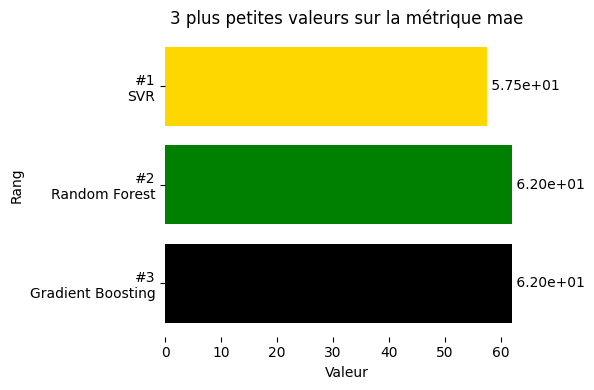


Bottom 3 des valeurs:
#3: Modéle Gradient Boosting, Valeur: 6.20e+01
#2: Modéle Random Forest, Valeur: 6.20e+01
#1: Modéle SVR, Valeur: 5.75e+01


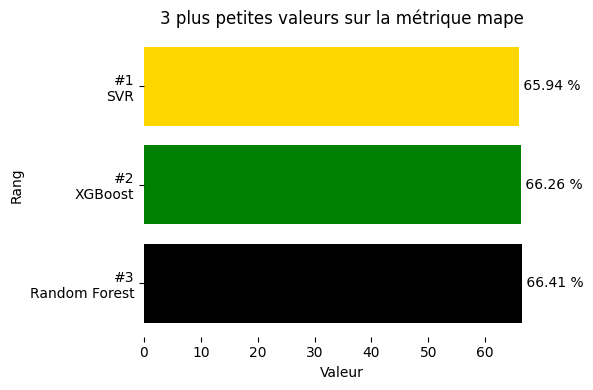


Bottom 3 des valeurs:
#3: Modéle Random Forest, Valeur: 66.41 %
#2: Modéle XGBoost, Valeur: 66.26 %
#1: Modéle SVR, Valeur: 65.94 %


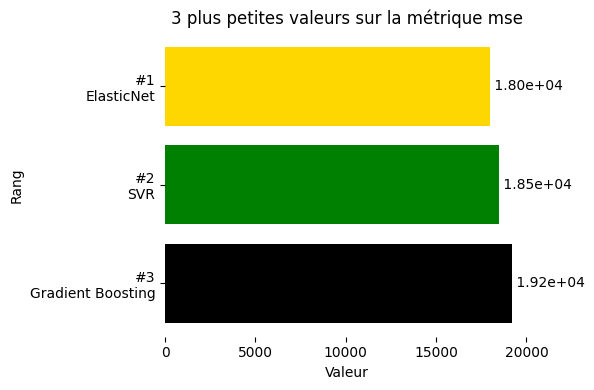


Bottom 3 des valeurs:
#3: Modéle Gradient Boosting, Valeur: 1.92e+04
#2: Modéle SVR, Valeur: 1.85e+04
#1: Modéle ElasticNet, Valeur: 1.80e+04


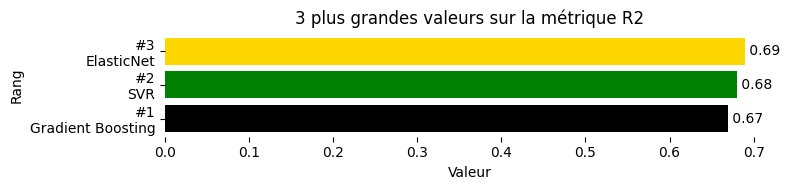


Bottom 3 des valeurs:
#1: Index Gradient Boosting, Valeur: 0.67
#2: Index SVR, Valeur: 0.68
#3: Index ElasticNet, Valeur: 0.69


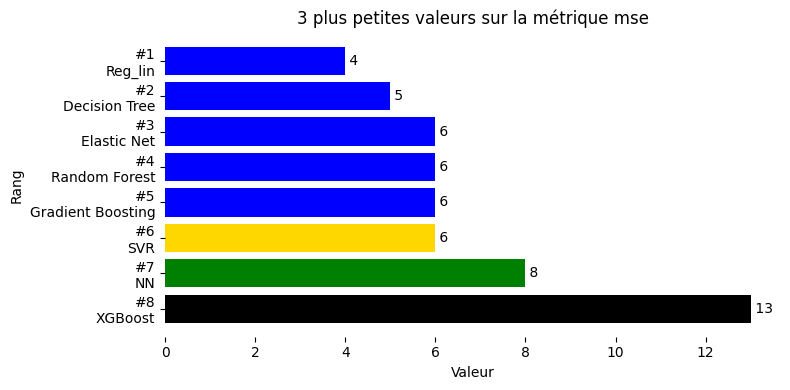

In [208]:
for DF,nom in [(Tableau_score_mae,'Tableau_score_mae'),(Tableau_score_mape,'Tableau_score_mape'),\
           (Tableau_score_mse,'Tableau_score_mse')]:
    
    DF['test']=pd.to_numeric(DF['test'])

    plt.rcParams['figure.max_open_warning'] = False
    plt.rcParams['agg.path.chunksize'] = 1000

    # Sélection des 3 plus petites valeurs
    bottom3_series = DF['test'].nsmallest(3)[::-1]
    bottom3_indices = bottom3_series.index
    bottom3_values = bottom3_series.values

    # Définition des couleurs
    colors = {
        2: 'gold',    # Or
        1: 'green',    # Argent
        0: 'black'     # Bronze
    }

    # Création de la figure avec taille contrôlée
    fig, ax = plt.subplots(figsize=(6, 4))  # Taille réduite et contrôlée

    # Création du graphique horizontal
    barh = ax.barh(range(3), bottom3_values, color=[colors[i] for i in range(3)])

    # Personnalisation du graphique
    ax.set_title(f'3 plus petites valeurs sur la métrique {nom.split('_')[-1]}')
    ax.set_xlabel('Valeur')
    ax.set_ylabel('Rang')

    # Personnalisation des labels de l'axe y
    ax.set_yticks(range(3))
    ax.set_yticklabels([f"#{3-i}\n{idx}" for i, idx in enumerate(bottom3_indices)])

    # Retirer le cadre
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Ajout des valeurs sur les barres
    for i, value in enumerate(bottom3_values):
        if nom in ['Tableau_score_mae','Tableau_score_mse']:
            ax.text(value, i, f' {value:.2e}', va='center')
        else:
            ax.text(value, i, f' {value:.2f} %', va='center')
    # Ajuster les marges
    plt.tight_layout()

    plt.show()

    # Affichage des valeurs dans le terminal
    print("\nBottom 3 des valeurs:")
    for i, (idx, val) in enumerate(zip(bottom3_indices, bottom3_values), 1):
        if nom in ['Tableau_score_mae','Tableau_score_mse']:
            print(f"#{4-i}: Modéle {idx}, Valeur: {val:.2e}")
        else:
            print(f"#{4-i}: Modéle {idx}, Valeur: {val:.2f} %")


Tableau_score_r2['test']=pd.to_numeric(Tableau_score_r2['test'])

plt.rcParams['figure.max_open_warning'] = False
plt.rcParams['agg.path.chunksize'] = 1000

# Sélection des 3 plus petites valeurs
bottom3_series = Tableau_score_r2['test'].nlargest(3)[::-1]
bottom3_indices = bottom3_series.index
bottom3_values = bottom3_series.values

# Définition des couleurs
colors = {
    2: 'gold',    # Or
    1: 'green',    # Argent
    0: 'black'     # Bronze
}

# Création de la figure avec taille contrôlée
fig, ax = plt.subplots(figsize=(8, 2))  # Taille réduite et contrôlée

# Création du graphique horizontal
barh = ax.barh(range(3), bottom3_values, color=[colors[i] for i in range(3)])

# Personnalisation du graphique
ax.set_title('3 plus grandes valeurs sur la métrique R2')
ax.set_xlabel('Valeur')
ax.set_ylabel('Rang')

# Personnalisation des labels de l'axe y
ax.set_yticks(range(3))
ax.set_yticklabels([f"#{i+1}\n{idx}" for i, idx in enumerate(bottom3_indices)])

# Retirer le cadre
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Ajout des valeurs sur les barres
for i, value in enumerate(bottom3_values):
    ax.text(value, i, f' {value:.2f}', va='center')

# Ajuster les marges
plt.tight_layout()

plt.show()

# Affichage des valeurs dans le terminal
print("\nBottom 3 des valeurs:")
for i, (idx, val) in enumerate(zip(bottom3_indices, bottom3_values), 1):
    print(f"#{i}: Index {idx}, Valeur: {val:.2f}")


Tableau_score_feature['Nbre Feature Pertinentes']=\
    pd.to_numeric(Tableau_score_feature['Nbre Feature Pertinentes'])

plt.rcParams['figure.max_open_warning'] = False
plt.rcParams['agg.path.chunksize'] = 1000

# Sélection des 3 plus petites valeurs
bottom3_series = Tableau_score_feature['Nbre Feature Pertinentes']\
    .nsmallest(len(Tableau_score_feature['Nbre Feature Pertinentes']))[::-1]
bottom3_indices = bottom3_series.index
bottom3_values = bottom3_series.values

# Définition des couleurs
colors = {
    8:'blue',
    7:'blue',
    6:'blue',
    5:'blue',
    4:'blue',
    3:'blue',
    2: 'gold',    # Or
    1: 'green',    # Argent
    0: 'black'     # Bronze
}

# Création de la figure avec taille contrôlée
fig, ax = plt.subplots(figsize=(8, 4))  # Taille réduite et contrôlée

# Création du graphique horizontal
barh = ax.barh(range(8), bottom3_values, color=[colors[i] for i in range(8)])

# Personnalisation du graphique
ax.set_title(f'3 plus petites valeurs sur la métrique {nom.split('_')[-1]}')
ax.set_xlabel('Valeur')
ax.set_ylabel('Rang')

# Personnalisation des labels de l'axe y
ax.set_yticks(range(8))
ax.set_yticklabels([f"#{8-i}\n{idx}" for i, idx in enumerate(bottom3_indices)])

# Retirer le cadre
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Ajout des valeurs sur les barres
for i, value in enumerate(bottom3_values):
    ax.text(value, i, f' {value}', va='center')
    
# Ajuster les marges
plt.tight_layout()

plt.show()


    



# GRID SEARCH

In [209]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
import xgboost as xgb
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Grilles d'hyperparamètres simples pour le premier test
param_grids = {
    'elastic': {
        'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    },
    'svr': {
        'kernel':['linear','rbf'],
        'C': [ 1.0, 10.0, 25, 100],
        'epsilon': [0.01, 0.05, 0.1, 0.5, 1],
        'gamma': ['scale', 'auto', 0.01, 0.1,1]
    },
    'xgb': {
        'n_estimators': [50, 100, 200, 300],
        'max_depth': [2, 4, 6, 8, None],
        'learning_rate': [0.001, 0.01, 0.1, 0.3],
        'subsample': [0.5, 0.7, 0.9],
        'min_child_weight': [1, 3, 5],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }
}


def grid_search_elastic(DF, col_num, target, type, log_feature):
    """Grid search pour Elastic Net avec affichage minimal"""
    results = []
    best_r2 = -np.inf
    best_mape = np.inf
    
    total = len(param_grids['elastic']['alpha']) * len(param_grids['elastic']['l1_ratio'])
    with tqdm(total=total, desc="Elastic Net") as pbar:
        for alpha in param_grids['elastic']['alpha']:
            for l1_ratio in param_grids['elastic']['l1_ratio']:
                _, _, _, results_df, _, _ ,_= reg_regul(
                    DF=DF,
                    col_num=col_num,
                    target=target,
                    type=type,
                    log_feature=log_feature,
                    alpha=alpha,
                    l1_ratio=l1_ratio
                )
                
                r2_value = float(results_df.loc['r2_ElasticNet_log_target_feature', 'test'])
                mape_value = float(results_df.loc['mape_ElasticNet_log_target_feature', 'test'])
                
                if r2_value > best_r2:
                    best_r2 = r2_value
                    print(f"\nElastic Net - Nouveau meilleur R² : {r2_value:.4f} avec alpha={alpha}, l1_ratio={l1_ratio}")
                
                if mape_value < best_mape:
                    best_mape = mape_value
                    print(f"\nElastic Net - Nouveau meilleur MAPE : {mape_value:.4f} avec alpha={alpha}, l1_ratio={l1_ratio}")
                
                results.append({
                    'alpha': alpha,
                    'l1_ratio': l1_ratio,
                    'r2_test': r2_value,
                    'mape_test': mape_value
                })
                pbar.update(1)
    
    return pd.DataFrame(results)

def grid_search_svr(DF, col_num, target, type, log_feature, MAE, MAPE, MSE, R2):
    """Grid search pour SVR avec vérifications et affichage minimal"""
    
    # 1. Vérifications préliminaires des données
    X = DF[col_num]
    y = DF[target]
    
    print("\nVérifications préliminaires:")
    print(f"Valeurs infinies dans X: {np.isinf(X).sum().sum()}")
    print(f"NaN dans X: {np.isnan(X).sum().sum()}")
    print(f"Valeurs infinies dans y: {np.isinf(y).sum()}")
    print(f"NaN dans y: {np.isnan(y).sum()}")
    
    # Stats des données
    print("\nStatistiques des données:")
    print(f"X min/max: {X.min().min():.2e} / {X.max().max():.2e}")
    print(f"y min/max: {y.min():.2e} / {y.max():.2e}")
    
    results = []
    best_r2 = -np.inf
    best_mape = np.inf
    
    total = len(param_grids['svr']['kernel']) * len(param_grids['svr']['C']) * \
            len(param_grids['svr']['epsilon']) * len(param_grids['svr']['gamma'])
            
    with tqdm(total=total, desc="SVR") as pbar:
        for kernel in param_grids['svr']['kernel']:
            for C in param_grids['svr']['C']:
                for epsilon in param_grids['svr']['epsilon']:
                    for gamma in param_grids['svr']['gamma']:
                        try:
                            params = {'kernel': kernel, 'C': C, 'epsilon': epsilon, 'gamma': gamma}
                            MAE_new, MAPE_new, MSE_new, R2_new, sv, _, _ = svr_reg(
                                DF=DF,
                                col_num=col_num,
                                target=target,
                                type=type,
                                col_a_log=log_feature,
                                MAE=MAE.copy(),
                                MAPE=MAPE.copy(),
                                MSE=MSE.copy(),
                                R2=R2.copy(),
                                verbose=False,
                                params=params
                            )
                            
                            r2_value = float(R2_new.loc['SVR', 'test'])
                            mape_value = float(MAPE_new.loc['SVR', 'test'])
                            
                            # Vérification des résultats
                            if np.isfinite(r2_value) and np.isfinite(mape_value):
                                if r2_value > best_r2:
                                    best_r2 = r2_value
                                    print(f"\nSVR - Nouveau meilleur R² : {r2_value:.4f} avec kernel={kernel}, C={C}, epsilon={epsilon}, gamma={gamma}")
                                
                                if mape_value < best_mape:
                                    best_mape = mape_value
                                    print(f"\nSVR - Nouveau meilleur MAPE : {mape_value:.4f} avec kernel={kernel}, C={C}, epsilon={epsilon}, gamma={gamma}")
                                
                                results.append({
                                    'kernel': kernel,
                                    'C': C,
                                    'epsilon': epsilon,
                                    'gamma': gamma,
                                    'r2_test': r2_value,
                                    'mape_test': mape_value
                                })
                            else:
                                print(f"\nAvertissement: Résultats non valides pour kernel={kernel}, C={C}, epsilon={epsilon}, gamma={gamma}")
                                
                        except Exception as e:
                            print(f"\nErreur avec kernel={kernel}, C={C}, epsilon={epsilon}, gamma={gamma}: {str(e)}")
                            continue
                            
                        pbar.update(1)
    
    if not results:
        raise ValueError("Aucune combinaison de paramètres n'a donné de résultats valides")
    
    return pd.DataFrame(results)

def grid_search_xgb(DF, col_num, target, type, log_feature, MAE, MAPE, MSE, R2):
    """Grid search pour XGBoost avec affichage minimal"""
    results = []
    best_r2 = -np.inf
    best_mape = np.inf
    
    total = len(param_grids['xgb']['n_estimators']) * len(param_grids['xgb']['max_depth']) * len(param_grids['xgb']['learning_rate'])
    with tqdm(total=total, desc="XGBoost") as pbar:
        for n_estimators in param_grids['xgb']['n_estimators']:
            for max_depth in param_grids['xgb']['max_depth']:
                for learning_rate in param_grids['xgb']['learning_rate']:
                    xgb_reg, new_MAE, new_MAPE, new_MSE, new_R2 = xgboost_reg(
                        DF=DF,
                        col_num=col_num,
                        target=target,
                        type=type,
                        col_a_log=log_feature,
                        MAE=MAE.copy(),
                        MAPE=MAPE.copy(),
                        MSE=MSE.copy(),
                        R2=R2.copy(),
                        verbose=False
                    )
                    
                    r2_value = float(new_R2.loc['XGBoost', 'test'])
                    mape_value = float(new_MAPE.loc['XGBoost', 'test'])
                    
                    if r2_value > best_r2:
                        best_r2 = r2_value
                        print(f"\nXGBoost - Nouveau meilleur R² : {r2_value:.4f} avec n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate}")
                    
                    if mape_value < best_mape:
                        best_mape = mape_value
                        print(f"\nXGBoost - Nouveau meilleur MAPE : {mape_value:.4f} avec n_estimators={n_estimators}, max_depth={max_depth}, learning_rate={learning_rate}")
                    
                    results.append({
                        'n_estimators': n_estimators,
                        'max_depth': max_depth,
                        'learning_rate': learning_rate,
                        'r2_test': r2_value,
                        'mape_test': mape_value
                    })
                    pbar.update(1)
    
    return pd.DataFrame(results)

# Code d'utilisation
"""

"""

'\n\n'

In [210]:
# Initialisation des DataFrames pour les métriques
MAE = pd.DataFrame(columns=['train', 'test', 'general'])
MAPE = pd.DataFrame(columns=['train', 'test', 'general'])
MSE = pd.DataFrame(columns=['train', 'test', 'general'])
R2 = pd.DataFrame(columns=['train', 'test', 'general'])

# Exécution des grid searches
results_elastic = grid_search_elastic(
    DF=DF_cleaned_lineaire,
    col_num=col_num_sel_regu,
    target='TotalGHGEmissions',
    type='log_target_feature',
    log_feature=['PropertyGFATotal']
)

results_svr = grid_search_svr(
    DF=DF_cleaned,
    col_num=col_num_sel_svr,
    target='TotalGHGEmissions',
    type='log_target_feature',
    log_feature=['PropertyGFATotal'],
    MAE=MAE.copy(),
    MAPE=MAPE.copy(),
    MSE=MSE.copy(),
    R2=R2.copy()
)

results_xgb = grid_search_xgb(
    DF=DF_cleaned,
    col_num=col_num_sel_xgb,
    target='TotalGHGEmissions',
    type='log_target_feature',
    log_feature=['PropertyGFATotal'],
    MAE=MAE.copy(),
    MAPE=MAPE.copy(),
    MSE=MSE.copy(),
    R2=R2.copy()
)

# Affichage des meilleurs résultats
print("\n=== Résultats Finaux ===")
print("\nElastic Net - Meilleurs paramètres :")
print(results_elastic.sort_values('r2_test', ascending=False).head(1))

print("\nSVR - Meilleurs paramètres :")
print(results_svr.sort_values('r2_test', ascending=False).head(1))

print("\nXGBoost - Meilleurs paramètres :")
print(results_xgb.sort_values('r2_test', ascending=False).head(1))

Elastic Net:  29%|██▊       | 10/35 [00:00<00:00, 47.72it/s]


Elastic Net - Nouveau meilleur R² : 0.6900 avec alpha=1e-05, l1_ratio=0.1

Elastic Net - Nouveau meilleur MAPE : 82.6100 avec alpha=1e-05, l1_ratio=0.1

Elastic Net - Nouveau meilleur MAPE : 82.6000 avec alpha=0.0001, l1_ratio=0.1

Elastic Net - Nouveau meilleur MAPE : 82.5900 avec alpha=0.001, l1_ratio=0.1


Elastic Net:  60%|██████    | 21/35 [00:00<00:00, 50.11it/s]


Elastic Net - Nouveau meilleur MAPE : 82.4900 avec alpha=0.01, l1_ratio=0.1

Elastic Net - Nouveau meilleur R² : 0.7000 avec alpha=0.01, l1_ratio=0.7


Elastic Net: 100%|██████████| 35/35 [00:00<00:00, 49.93it/s]



Vérifications préliminaires:
Valeurs infinies dans X: 0
NaN dans X: 0
Valeurs infinies dans y: 0
NaN dans y: 0

Statistiques des données:
X min/max: 0.00e+00 / 1.95e+06
y min/max: 4.00e-01 / 1.23e+04


SVR:   0%|          | 1/200 [00:00<00:25,  7.90it/s]


SVR - Nouveau meilleur R² : 0.6400 avec kernel=linear, C=1.0, epsilon=0.01, gamma=scale

SVR - Nouveau meilleur MAPE : 72.3200 avec kernel=linear, C=1.0, epsilon=0.01, gamma=scale


SVR:   4%|▎         | 7/200 [00:00<00:24,  7.91it/s]


SVR - Nouveau meilleur MAPE : 71.2400 avec kernel=linear, C=1.0, epsilon=0.05, gamma=scale


SVR:   6%|▌         | 12/200 [00:01<00:22,  8.30it/s]


SVR - Nouveau meilleur R² : 0.6500 avec kernel=linear, C=1.0, epsilon=0.1, gamma=scale

SVR - Nouveau meilleur MAPE : 70.2500 avec kernel=linear, C=1.0, epsilon=0.1, gamma=scale


SVR:  50%|█████     | 101/200 [00:56<00:26,  3.72it/s]


SVR - Nouveau meilleur R² : 0.6900 avec kernel=rbf, C=1.0, epsilon=0.01, gamma=scale

SVR - Nouveau meilleur MAPE : 65.3400 avec kernel=rbf, C=1.0, epsilon=0.01, gamma=scale


SVR:  52%|█████▏    | 104/200 [00:57<00:27,  3.51it/s]


SVR - Nouveau meilleur R² : 0.7200 avec kernel=rbf, C=1.0, epsilon=0.01, gamma=0.1


SVR:  52%|█████▎    | 105/200 [00:57<00:27,  3.45it/s]


SVR - Nouveau meilleur MAPE : 64.7300 avec kernel=rbf, C=1.0, epsilon=0.01, gamma=1


SVR:  62%|██████▏   | 123/200 [01:00<00:06, 11.43it/s]


SVR - Nouveau meilleur R² : 0.7300 avec kernel=rbf, C=1.0, epsilon=0.5, gamma=0.1


SVR:  63%|██████▎   | 126/200 [01:01<00:07,  9.68it/s]


SVR - Nouveau meilleur MAPE : 60.9900 avec kernel=rbf, C=10.0, epsilon=0.01, gamma=scale


XGBoost:   1%|▏         | 1/80 [00:00<00:08,  9.82it/s]


XGBoost - Nouveau meilleur R² : 0.6100 avec n_estimators=50, max_depth=2, learning_rate=0.001

XGBoost - Nouveau meilleur MAPE : 66.2600 avec n_estimators=50, max_depth=2, learning_rate=0.001


XGBoost: 100%|██████████| 80/80 [00:07<00:00, 10.71it/s]


=== Résultats Finaux ===

Elastic Net - Meilleurs paramètres :
    alpha  l1_ratio  r2_test  mape_test
19   0.01       0.9      0.7      82.74

SVR - Meilleurs paramètres :
    kernel    C  epsilon gamma  r2_test  mape_test
118    rbf  1.0      0.5   0.1     0.73      71.55

XGBoost - Meilleurs paramètres :
   n_estimators  max_depth  learning_rate  r2_test  mape_test
0            50        2.0          0.001     0.61      66.26


ON VA STOCKER LES MEILLEURS PARAMETRES DU SVR DANS best_params_svr

In [211]:
best_params_svr={'kernel':'rbf','C':10,'epsilon':0.1,'gamma':0.01}

ON VA RELANCER LES MODELES ELASTIC NET ET SVR AFIN DE LES UTILISER PAR LA SUITE 

In [212]:
ridge,lasso,elastic_log,resultats,y_test,y_pred_elastic,scl_log_ela_X=\
    reg_regul(DF_cleaned_lineaire,col_num_sel_regu,TARGET,type='log_target_feature',
              log_feature=['PropertyGFATotal'],alpha=0.01,l1_ratio=0.9)

In [213]:
Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,svr_log,sclX,sclY=\
        svr_reg(DF_cleaned,col_num_sel_svr,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,True,best_params_svr)

Score R² train : 0.80
Score R² test : 0.73
Score MAE train : 7.67e+01
Score MAE test : 5.58e+01
Score MAPE train : 65.66 %
Score MAPE test : 65.18 %
Score MSE train : 8.46e+04
Score MSE test : 1.59e+04


R2 0.8/073 MAPE 65.18

# MIX

In [214]:
print(col_num_sel_regu)
print(col_num_sel_svr)

['PropertyGFATotal', 'NumberofBuildings', '%_steam(kBtu)', 'PrimaryPropertyType_Santé', 'NumberofFloors', '%_elec(kBtu)']
['PropertyGFATotal', '%_elec(kBtu)', '%_steam(kBtu)', 'PrimaryPropertyType_Santé', 'NumberofFloors', 'PrimaryPropertyType_Immobilier Commercial']


In [215]:
from sklearn.metrics import mean_absolute_percentage_error

# Préparation des données
X_ela = DF_cleaned_lineaire[col_num_sel_regu]
X_ela['PropertyGFATotal'] = np.log(X_ela['PropertyGFATotal'])
X_ela_scaled = pd.DataFrame(
    scl_log_ela_X.transform(X_ela),
    index=X_ela.index,
    columns=X_ela.columns
)

X_svr = DF_cleaned[col_num_sel_svr]
X_svr['PropertyGFATotal'] = np.log(X_svr['PropertyGFATotal'])
X_svr_scaled = pd.DataFrame(
    sclX.transform(X_svr),
    index=X_svr.index,
    columns=X_svr.columns
)

y = np.log(DF_cleaned[TARGET])

# Train test split
X_ela_train, X_ela_test, y_train, y_test = train_test_split(
    X_ela_scaled, y,
    test_size=0.2,
    random_state=42
)

# Récupération des indices
train_indices = X_ela_train.index
test_indices = X_ela_test.index

# Application des mêmes indices pour X_svr
X_svr_train = X_svr_scaled.loc[train_indices]
X_svr_test = X_svr_scaled.loc[test_indices]

# Vérification de la cohérence
print("\nVérification de la cohérence :")
print(f"Même nombre d'observations train : {len(X_ela_train) == len(X_svr_train) == len(y_train)}")
print(f"Même nombre d'observations test : {len(X_ela_test) == len(X_svr_test) == len(y_test)}")

# Prédictions
y_train_pred_ela = elastic_log.predict(X_ela_train)
y_test_pred_ela = elastic_log.predict(X_ela_test)
y_general_pred_ela = elastic_log.predict(X_ela_scaled)

y_train_pred_svr = svr_log.predict(X_svr_train)
y_test_pred_svr = svr_log.predict(X_svr_test)
y_general_pred_svr = svr_log.predict(X_svr_scaled)

y_train_pred_svr = sclY.inverse_transform(y_train_pred_svr.reshape(-1, 1)).ravel()
y_test_pred_svr = sclY.inverse_transform(y_test_pred_svr.reshape(-1, 1)).ravel()
y_general_pred_svr = sclY.inverse_transform(y_general_pred_svr.reshape(-1, 1)).ravel()


# Conversion des y en valeurs non-log
y_train_exp = np.exp(y_train)
y_test_exp = np.exp(y_test)
y_exp = np.exp(y)

# Boucle sur les poids
for i in range(11):
    poids_1 = round(i/10,1)
    poids_2=round(1-poids_1,1)
    y_train_pred = poids_1 * y_train_pred_svr + poids_2 * y_train_pred_ela
    y_test_pred = poids_1 * y_test_pred_svr + poids_2 * y_test_pred_ela
    y_general_pred = poids_1 * y_general_pred_svr + poids_2 * y_general_pred_ela
    
    # Application de exp après la pondération
    y_train_pred_exp = np.exp(y_train_pred)
    y_test_pred_exp = np.exp(y_test_pred)
    y_general_pred_exp = np.exp(y_general_pred)
    
    print(f'\nPour une répartition {poids_1} SVR/ {poids_2} Elastic on obtient les résultats suivants:')
    print(f'\nR2 TRAIN : {r2_score(y_train_exp, y_train_pred_exp):.2f}')
    print(f'R2 TEST : {r2_score(y_test_exp, y_test_pred_exp):.2f}')
    print(f'R2 global : {r2_score(y_exp, y_general_pred_exp):.2f}')
    print(f'\nMAPE TRAIN : {mean_absolute_percentage_error(y_train_exp, y_train_pred_exp)*100:.1f} %')
    print(f'MAPE TEST : {mean_absolute_percentage_error(y_test_exp, y_test_pred_exp)*100:.1f} %')
    print(f'MAPE GLOBAL : {mean_absolute_percentage_error(y_exp, y_general_pred_exp)*100:.1f} %')


Vérification de la cohérence :
Même nombre d'observations train : True
Même nombre d'observations test : True

Pour une répartition 0.0 SVR/ 1.0 Elastic on obtient les résultats suivants:

R2 TRAIN : 0.79
R2 TEST : 0.70
R2 global : 0.79

MAPE TRAIN : 83.4 %
MAPE TEST : 82.7 %
MAPE GLOBAL : 83.3 %

Pour une répartition 0.1 SVR/ 0.9 Elastic on obtient les résultats suivants:

R2 TRAIN : 0.80
R2 TEST : 0.71
R2 global : 0.80

MAPE TRAIN : 80.8 %
MAPE TEST : 80.1 %
MAPE GLOBAL : 80.7 %

Pour une répartition 0.2 SVR/ 0.8 Elastic on obtient les résultats suivants:

R2 TRAIN : 0.82
R2 TEST : 0.72
R2 global : 0.81

MAPE TRAIN : 78.4 %
MAPE TEST : 77.7 %
MAPE GLOBAL : 78.3 %

Pour une répartition 0.3 SVR/ 0.7 Elastic on obtient les résultats suivants:

R2 TRAIN : 0.82
R2 TEST : 0.73
R2 global : 0.82

MAPE TRAIN : 76.2 %
MAPE TEST : 75.5 %
MAPE GLOBAL : 76.0 %

Pour une répartition 0.4 SVR/ 0.6 Elastic on obtient les résultats suivants:

R2 TRAIN : 0.83
R2 TEST : 0.73
R2 global : 0.82

MAPE TRAI

ICI UN SVR PUR AVEC LES MEILLEURS HYPER PARAMETRES POURRAIT SUFFIR A AMELIORER LE R2 ET LA MAPE

# ETUDE DES PERFORMANCES SUR LES DIX DERNIERES ANNEES

ON VA SIMULER LES PERFORMANCES DE NOTRE MODELE COMME S'IL AVAIT ETE ENTRAINE IL Y A DIX ANS ET AVAIT TOURNE EN PRODUCTION DURANT CES DIX ANNEES

In [216]:
DF_cleaned['AGE'].min()

9

In [217]:
DF_cleaned_lineaire_age=DF_cleaned_lineaire.loc[DF_cleaned['AGE']>=18]
DF_cleaned_lineaire_age.shape

(1330, 34)

In [218]:
DF_cleaned_lineaire_age_pred=DF_cleaned_lineaire.loc[DF_cleaned_lineaire['AGE']<18]

In [219]:
ridge,lasso,elastic_log_age,resultats_age,y_test,y_pred_elastic,scl_log_ela_X_age=\
    reg_regul(DF_cleaned_lineaire_age,col_num_sel_regu,TARGET,type='log_target_feature',
              log_feature=['PropertyGFATotal'],alpha=0.01,l1_ratio=0.9)

In [220]:
resultats_age

,train,test,general
mae_ElasticNet_log_target_feature,8.10e+01,7.87e+01,8.05e+01
mae_Lasso_log_target_feature,8.07e+01,7.97e+01,8.05e+01
mae_Ridge_log_target_feature,8.31e+01,7.84e+01,8.22e+01
mape_ElasticNet_log_target_feature,85.76,70.94,82.79
mape_Lasso_log_target_feature,85.78,70.98,82.82
mape_Ridge_log_target_feature,85.42,70.94,82.53
mse_ElasticNet_log_target_feature,9.37e+04,6.84e+04,8.86e+04
mse_Lasso_log_target_feature,8.92e+04,7.14e+04,8.57e+04
mse_Ridge_log_target_feature,1.45e+05,5.72e+04,1.27e+05
r2_ElasticNet_log_target_feature,0.67,0.90,0.76


ON REMARQUE DES PERFORMANCES EXCEPTIONNELLES DE LA REGRESSION REGULARISEE SUR CE SOUS ENSEMBLE DE POPULATION AVEC UN R2 A 0.92 POUR LE RIDGE

In [221]:
X_age=DF_cleaned_lineaire_age_pred[col_num_sel_regu]
y=DF_cleaned_lineaire_age_pred[TARGET]

X_age['PropertyGFATotal']=np.log(X_age['PropertyGFATotal'])


X_age_scaled=scl_log_ela_X_age.transform(X_age)

y_pred=ridge.predict(X_age_scaled)

y_pred=np.exp(y_pred)

print(f'Voila les resultats sur les batiments construits ces dix derniéres années :')
print(f'\n R2 : {r2_score(y,y_pred):.2f}')
print(f' MAPE : {mean_absolute_percentage_error(y,y_pred)*100:.2f} %')

Voila les resultats sur les batiments construits ces dix derniéres années :

 R2 : 0.54
 MAPE : 55.04 %


CEPENDANT ON CONSTATE UNE CHUTE DU R2 A 0.53

## SVR

CHANGER LES PARAMS


In [222]:
DF_cleaned_age=DF_cleaned.loc[DF_cleaned['AGE']>=18]
DF_cleaned_age.shape

(1330, 37)

In [223]:
DF_cleaned_age_pred=DF_cleaned.loc[DF_cleaned['AGE']<18]

In [224]:
Tableau_score_mae_,Tableau_score_mape_,Tableau_score_mse_,Tableau_score_r2_,svr_log_age,sclX_age,sclY_age=\
        svr_reg(DF_cleaned_age,col_num_sel_svr,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,True,best_params_svr)

Score R² train : 0.83
Score R² test : 0.72
Score MAE train : 6.60e+01
Score MAE test : 9.31e+01
Score MAPE train : 66.99 %
Score MAPE test : 58.95 %
Score MSE train : 4.85e+04
Score MSE test : 1.99e+05


In [225]:
X_age=DF_cleaned_age_pred[col_num_sel_svr]
y=DF_cleaned_age_pred[TARGET]

X_age['PropertyGFATotal']=np.log(X_age['PropertyGFATotal'])


X_age_scaled=sclX_age.transform(X_age)

y_pred=svr_log_age.predict(X_age_scaled)
y_pred = sclY_age.inverse_transform(y_pred.reshape(-1,1)).ravel()

y_pred=np.exp(y_pred)

print(f'Voila les resultats sur les batiments construits ces dix derniéres années :')
print(f'\n R2 : {r2_score(y,y_pred):.2f}')
print(f' MAPE : {mean_absolute_percentage_error(y,y_pred)*100:.2f} %')

Voila les resultats sur les batiments construits ces dix derniéres années :

 R2 : 0.70
 MAPE : 47.20 %


# ETUDE DES PERFORMANCES AVEC ET SANS ENERGY STAR SCORE


In [226]:
col_num_sel_svr_energy=col_num_sel_svr+['ENERGYSTARScore']
col_num_sel_regu_energy=col_num_sel_regu+['ENERGYSTARScore']

In [227]:
DF_cleaned_lineaire_Energy=DF_cleaned_lineaire.loc[~DF_cleaned_lineaire['ENERGYSTARScore'].isna()]
DF_cleaned_lineaire_Energy.shape

(978, 34)

In [228]:
ridge,lasso,elastic_log,resultats,y_test,y_pred_elastic,scl_log_ela_X=\
    reg_regul(DF_cleaned_lineaire_Energy,col_num_sel_regu,TARGET,type='log_target_feature',
              log_feature=['PropertyGFATotal'],alpha=0.01,l1_ratio=0.9)

In [229]:
resultats

,train,test,general
mae_ElasticNet_log_target_feature,8.07e+01,6.31e+01,7.72e+01
mae_Lasso_log_target_feature,8.06e+01,6.32e+01,7.72e+01
mae_Ridge_log_target_feature,8.03e+01,6.33e+01,7.69e+01
mape_ElasticNet_log_target_feature,72.29,69.65,71.76
mape_Lasso_log_target_feature,72.33,69.66,71.79
mape_Ridge_log_target_feature,71.94,69.54,71.46
mse_ElasticNet_log_target_feature,9.99e+04,2.08e+04,8.41e+04
mse_Lasso_log_target_feature,9.89e+04,2.10e+04,8.33e+04
mse_Ridge_log_target_feature,1.26e+05,2.06e+04,1.05e+05
r2_ElasticNet_log_target_feature,0.82,0.76,0.82


In [230]:
ridge,lasso,elastic_log,resultats,y_test,y_pred_elastic,scl_log_ela_X=\
    reg_regul(DF_cleaned_lineaire_Energy,col_num_sel_regu_energy,TARGET,type='log_target_feature',
              log_feature=['PropertyGFATotal'],alpha=0.01,l1_ratio=0.9)

In [231]:
resultats

,train,test,general
mae_ElasticNet_log_target_feature,6.91e+01,5.02e+01,6.53e+01
mae_Lasso_log_target_feature,6.90e+01,5.00e+01,6.52e+01
mae_Ridge_log_target_feature,7.43e+01,5.22e+01,6.99e+01
mape_ElasticNet_log_target_feature,59.80,56.50,59.14
mape_Lasso_log_target_feature,59.82,56.48,59.15
mape_Ridge_log_target_feature,59.60,56.55,58.99
mse_ElasticNet_log_target_feature,9.20e+04,1.17e+04,7.59e+04
mse_Lasso_log_target_feature,9.12e+04,1.16e+04,7.53e+04
mse_Ridge_log_target_feature,1.41e+05,1.35e+04,1.15e+05
r2_ElasticNet_log_target_feature,0.84,0.87,0.84



Features importantes (importance > 0.01):
                              Ridge     Lasso  ElasticNet  Importance_moyenne
PropertyGFATotal           1.000000  1.000000    1.000000            1.000000
%_elec(kBtu)               0.739503  0.734222    0.733387            0.735704
ENERGYSTARScore            0.314989  0.306485    0.306799            0.309425
%_steam(kBtu)              0.104823  0.100881    0.101559            0.102421
PrimaryPropertyType_Santé  0.071389  0.067503    0.068102            0.068998
NumberofFloors             0.059335  0.052334    0.052027            0.054565
NumberofBuildings          0.041879  0.037063    0.036272            0.038405


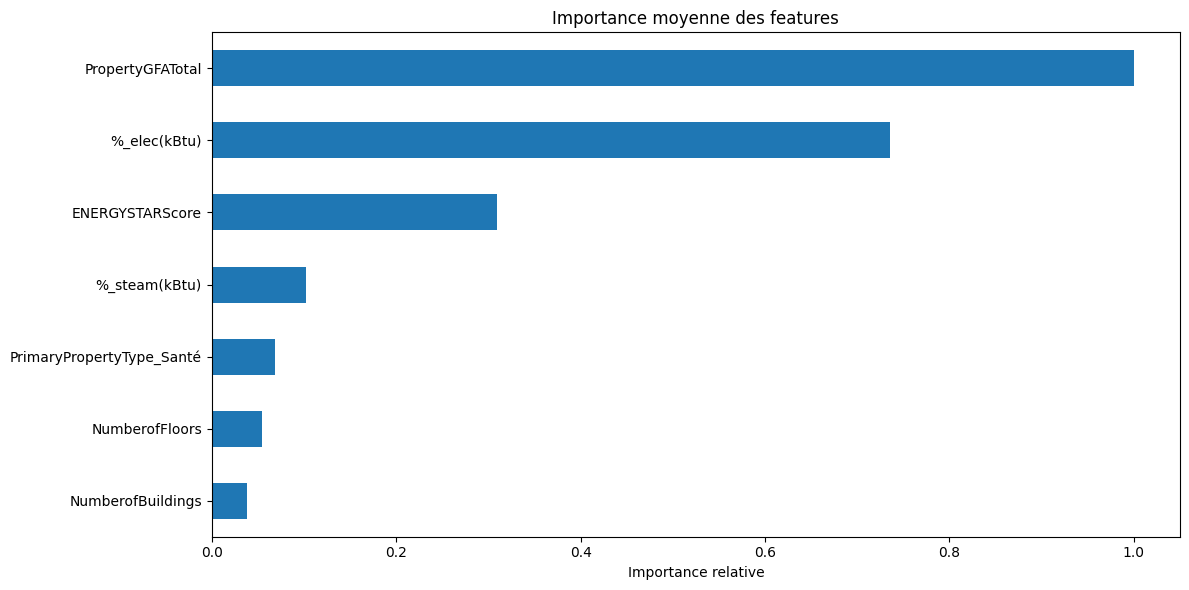

In [232]:
models=[ridge,lasso,elastic_log]
model_names=['Ridge','Lasso','ElasticNet']

def analyze_feature_importance(models, model_names, feature_names, threshold=0.01):
    importance_summary = pd.DataFrame()
    
    for model, name in zip(models, model_names):
        # Normaliser les coefficients
        normalized_coef = np.abs(model.coef_) / np.abs(model.coef_).max()
        importance_summary[name] = normalized_coef
    
    importance_summary.index = feature_names
    
    # Calculer le score moyen d'importance
    importance_summary['Importance_moyenne'] = importance_summary.mean(axis=1)
    
    # Identifier les features importantes
    important_features = importance_summary[
        importance_summary['Importance_moyenne'] > threshold
    ].sort_values('Importance_moyenne', ascending=False)
    
    print("\nFeatures importantes (importance > {}):".format(threshold))
    print(important_features)
    col_num_sel=list(important_features.head(6).index)
    # Visualisation
    plt.figure(figsize=(12, 6))
    importance_summary['Importance_moyenne'].sort_values().plot(kind='barh')
    plt.title('Importance moyenne des features')
    plt.xlabel('Importance relative')
    plt.tight_layout()
    plt.show()
    
    return importance_summary,list(col_num_sel)

# Utilisation de la fonction
importance_analysis,col_num_sel_regu = analyze_feature_importance(models, model_names, col_num_sel_regu_energy)

## SVR 

In [233]:
DF_cleaned_Energy=DF_cleaned.loc[~DF_cleaned['ENERGYSTARScore'].isna()]
DF_cleaned_Energy.shape

(978, 37)

In [234]:
Tableau_score_mae_,Tableau_score_mape_,Tableau_score_mse_,Tableau_score_r2_,svr_log_age,sclX_age,sclY_age=\
        svr_reg(DF_cleaned_Energy,col_num_sel_svr,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,True,best_params_svr)

Score R² train : 0.79
Score R² test : 0.82
Score MAE train : 7.23e+01
Score MAE test : 4.92e+01
Score MAPE train : 53.68 %
Score MAPE test : 48.64 %
Score MSE train : 1.20e+05
Score MSE test : 1.60e+04


In [235]:
Tableau_score_mae_,Tableau_score_mape_,Tableau_score_mse_,Tableau_score_r2_,svr_log_age,sclX_age,sclY_age=\
        svr_reg(DF_cleaned_Energy,col_num_sel_svr_energy,TARGET,'log_target_feature',['PropertyGFATotal']
        ,Tableau_score_mae,Tableau_score_mape,Tableau_score_mse,Tableau_score_r2,True,best_params_svr)

Score R² train : 0.84
Score R² test : 0.91
Score MAE train : 6.05e+01
Score MAE test : 3.79e+01
Score MAPE train : 36.99 %
Score MAPE test : 35.57 %
Score MSE train : 9.00e+04
Score MSE test : 8.09e+03


In [236]:
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

X=DF_cleaned_Energy[col_num_sel_svr_energy]
y=DF_cleaned_Energy[TARGET]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Scaling des données log-transformées
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Scaling de y aussi
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1)).ravel()




# Calcul des permutation importances pour le SVR
result = permutation_importance(
   svr_log_age, 
   X_test_scaled,
   y_test_scaled,
   n_repeats=10,
   random_state=42
)

# Création d'un dictionnaire avec les importances moyennes
importances = result.importances_mean
feature_names = X_test.columns
importances_dict = dict(zip(feature_names, importances))

# Tri par importance décroissante
sorted_importances = dict(sorted(importances_dict.items(), key=lambda x: x[1], reverse=True))

col_num_sel_svr=[]

# Affichage des résultats avec les écarts-types
for feature, importance in sorted_importances.items():
   std = result.importances_std[list(feature_names).index(feature)]
   print(f"{feature}: {importance:.4f} (±{std:.4f})")
   if importance>0.045:
      col_num_sel_svr.append(feature)

PropertyGFATotal: 2.5657 (±0.3481)
%_elec(kBtu): 1.7691 (±0.1319)
PrimaryPropertyType_Immobilier Commercial: 0.8487 (±0.1639)
ENERGYSTARScore: 0.2435 (±0.0929)
PrimaryPropertyType_Santé: 0.1201 (±0.1116)
NumberofFloors: 0.1099 (±0.0499)
%_steam(kBtu): -0.0343 (±0.0481)
